<a href="https://colab.research.google.com/github/pedrobslima/proj-respAI/blob/main/respAI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

min 8 features úteis (o menor num dentre os datasets utilizados em aula, diabetes)

### Especificações

1. Escolha uma base de dados do seu interesse e construa modelos preditivos.

2. Trabalhe agora com os dois aspectos principais explorados em sala:

  - (a) Interpretabilidade: discuta o que o modelo aprendeu, como ele realiza suas predições, quais as variáveis mais importantes,... dentre outros aspectos que ajude a entender o comportamento do modelo enquanto realiza suas predições.   

  - (b) Confiabilidade: qual o desempenho preditivo do modelo, em que situações ele falha, em que situações tem o seu melhor desempenho,... dentre outros pontos que ajude a entender quando confiar as predições do modelo.

- Obs. 1: utilize uma base de dados nova, não usada nas aulas;

- Obs. 2: a entrega será feita com:

  - (a) um notebook comentado com os insights obtidos pela equipe. Mais que gerar gráficos e estatísticas, é importante que se analise os resultados obtidos e que se apontem as conclusões mais importantes.

  - (b) um pequeno vídeo até 10 minutos descrevendo o que foi produzido no notebook.

### Dicionário dataset
* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Mega Bytes
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not
---
* price_range: The target variable with value:
  * 0: low cost
  * 1: medium cost
  * 2: high cost
  * 3: very high cost

### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay as pdp
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from random import randint
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### dataset (df)

In [2]:
df = pd.read_csv("/content/mobile_price.csv")

In [3]:
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [4]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

<Axes: >

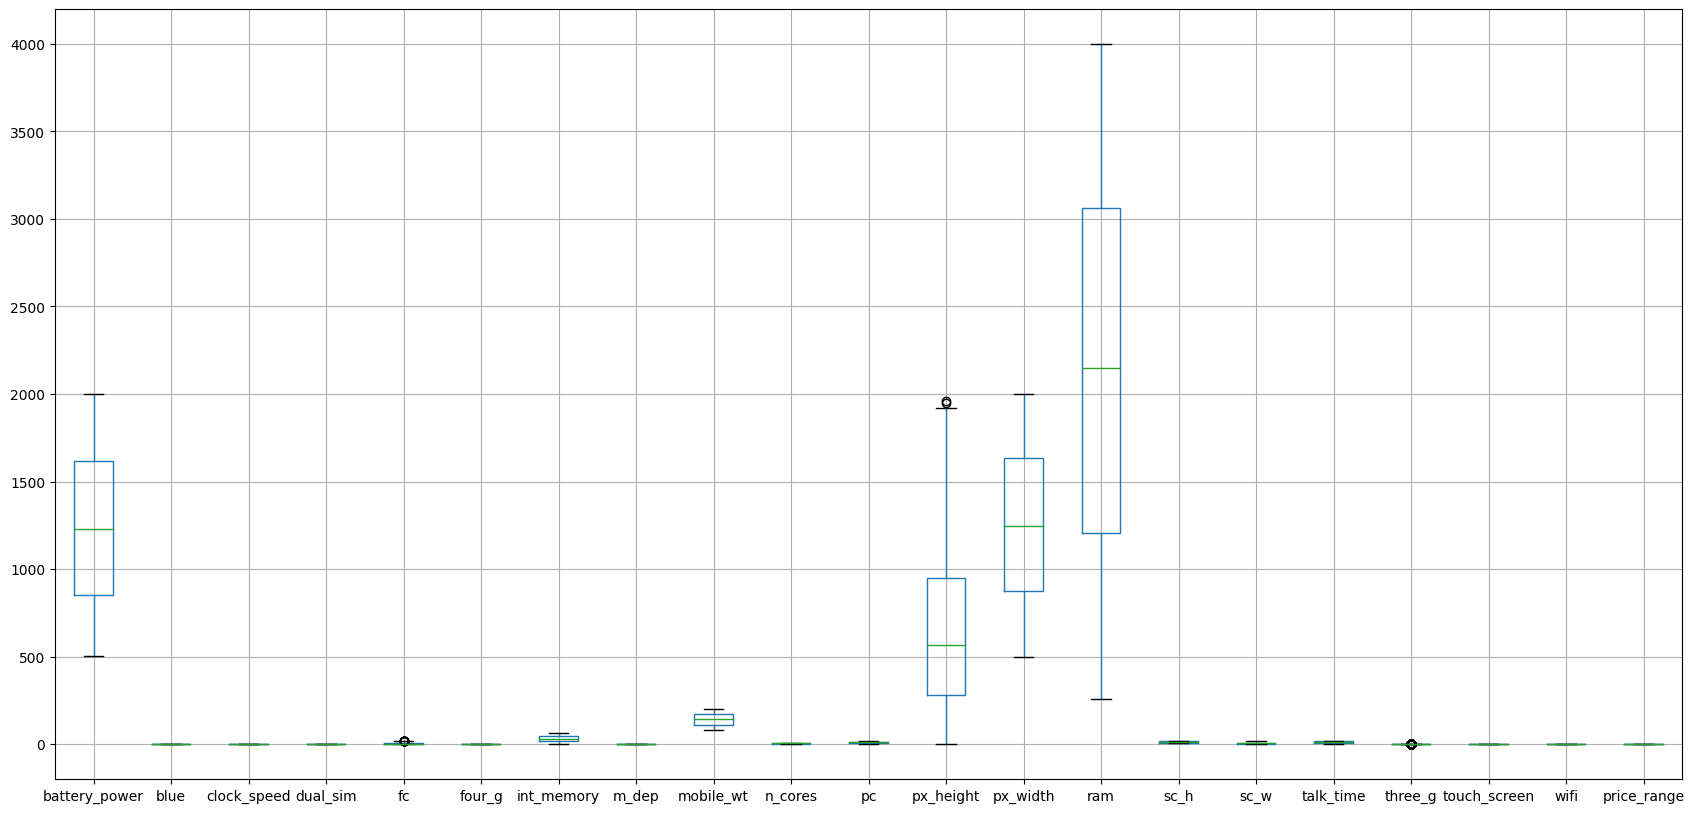

In [5]:
df.boxplot(figsize=(21,10))

In [6]:
X = df.drop(columns=['price_range'])
y = df['price_range'] #.astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [7]:
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [8]:
display_labels = ['Baixo', 'Médio', 'Alto', 'Mto alto']

### dataset 2 (dft)

In [9]:
df.min(), df.max()

(battery_power    501.0
 blue               0.0
 clock_speed        0.5
 dual_sim           0.0
 fc                 0.0
 four_g             0.0
 int_memory         2.0
 m_dep              0.1
 mobile_wt         80.0
 n_cores            1.0
 pc                 0.0
 px_height          0.0
 px_width         500.0
 ram              256.0
 sc_h               5.0
 sc_w               0.0
 talk_time          2.0
 three_g            0.0
 touch_screen       0.0
 wifi               0.0
 price_range        0.0
 dtype: float64,
 battery_power    1998.0
 blue                1.0
 clock_speed         3.0
 dual_sim            1.0
 fc                 19.0
 four_g              1.0
 int_memory         64.0
 m_dep               1.0
 mobile_wt         200.0
 n_cores             8.0
 pc                 20.0
 px_height        1960.0
 px_width         1998.0
 ram              3998.0
 sc_h               19.0
 sc_w               18.0
 talk_time          20.0
 three_g             1.0
 touch_screen        1.0
 wif

In [10]:
dft = df.copy()
cols = ['mobile_wt', 'battery_power', 'px_height', 'px_width', 'ram'] # dft.drop(columns=['price_range']).columns
#scaler = MinMaxScaler()
for c in cols:
  scaler = MinMaxScaler((df[c].min()/100, df[c].max()/100))
  dft[c] = scaler.fit_transform(np.array(dft[c]).reshape(-1, 1))

<Axes: >

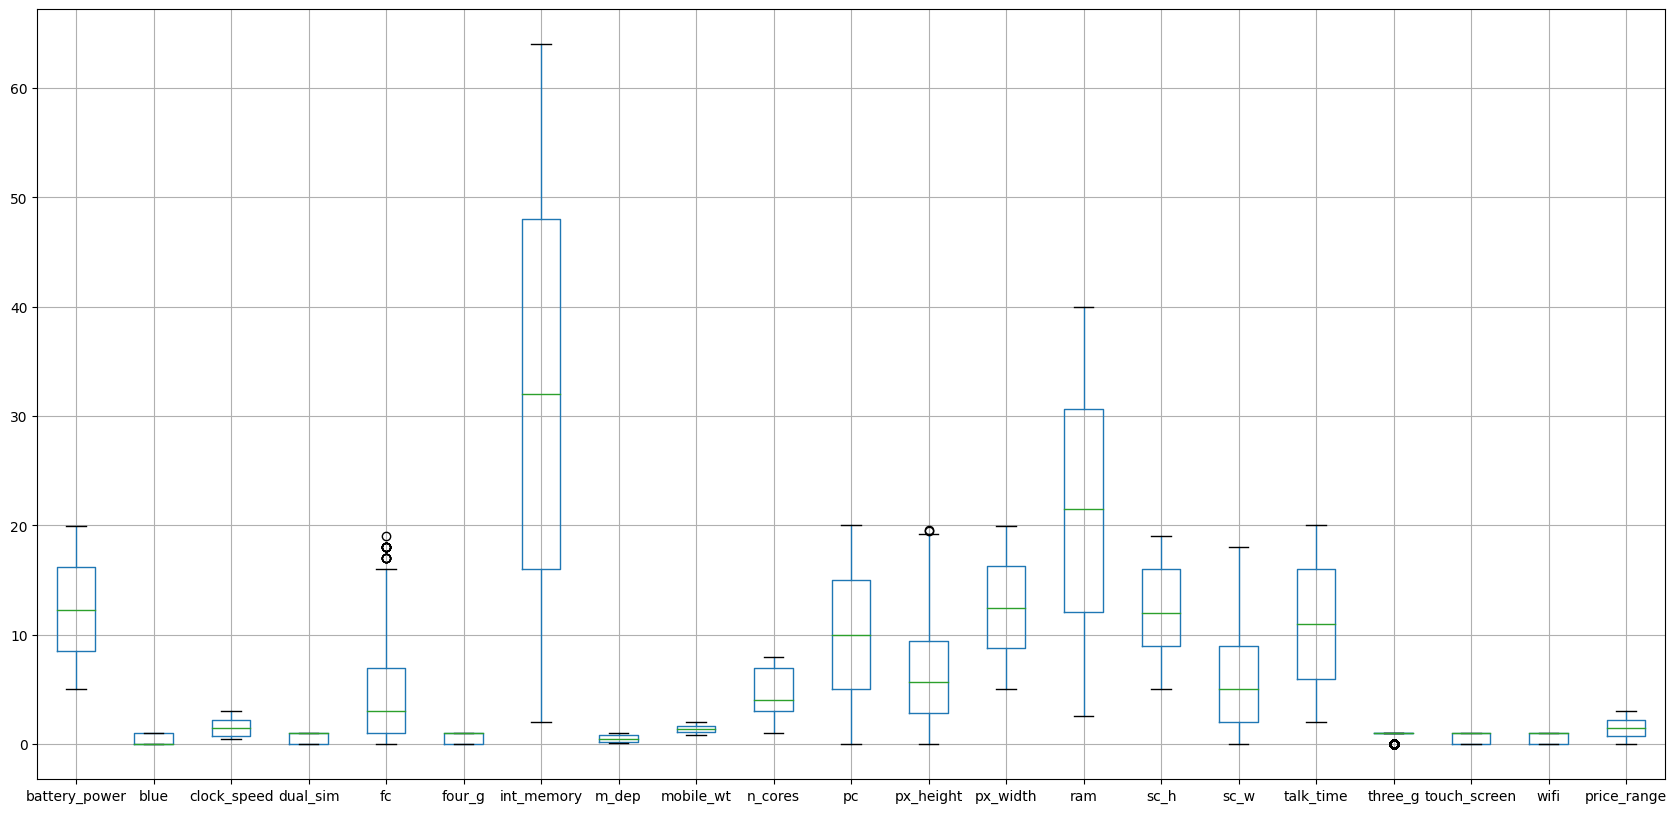

In [11]:
dft.boxplot(figsize=(21,10))

In [12]:
Xt = dft.drop(columns=['price_range'])

X_train2, X_test2, y_train2, y_test2 = train_test_split(Xt, y, test_size=0.25, shuffle=True)

### dataset 3 (dtram)

In [13]:
dfram = dft.drop(columns=['ram']).copy()

Xram = dfram.drop(columns=['price_range'])

X_train3, X_test3, y_train3, y_test3 = train_test_split(Xram, y, test_size=0.25, shuffle=True)

### Functions

In [14]:
def checkMetrics(test, pred, display=None):
  global y
  labels = np.sort(y.unique())
  print(f"Acurácia: {accuracy_score(test, pred)}")
  print(f"Precisão: {precision_score(test, pred, labels=labels, average='macro')}")
  print(f"Recall: {recall_score(test, pred, labels=labels, average='macro')}")
  print(f"F1-Score: {f1_score(test, pred, labels=labels, average='macro')}")
  print("Matriz de Confusão:")

  cm = confusion_matrix(test, pred, labels=labels)

  if(display):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display)
  else:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

  disp.plot()

  plt.show()

In [15]:
def pfi(model, x, y, name=None):
  result = permutation_importance(model, x, y,n_repeats=30, random_state=0)

  cols = [f"[{i}] - {x.columns[i]}" for i in range(len(x.columns))]

  importances = pd.Series(result.importances_mean, index=cols)

  fig, ax = plt.subplots()

  importances.plot.bar(yerr=result.importances_std, ax=ax)

  if(name):
    ax.set_title(f"Feature importances on {name} model")
  else:
    name = str(model)
    i = name.find('(')
    ax.set_title(f"Feature importances on {name[:i]} model\n{name[i:]}")
  ax.set_ylabel("Mean accuracy decrease")
  fig.tight_layout()
  plt.show()

In [16]:
def pdpClasses(model, x, features: list, res: int = 10, classes: list=[0,1,2,3]):
  global display_labels
  for idx in classes:
    pdp.from_estimator(model, x, features, target=idx, grid_resolution=res)
    plt.title(display_labels[idx])
  plt.show()

In [17]:
def pdp2versions(model_list: list | tuple, x_list: list | tuple, features: list, res: int = 10, classes: list=[0,1,2,3], axis:int=0):
  if(axis==0):
    for idx in classes:
      for i, (model, xt) in enumerate(zip(model_list, x_list)):
        name = str(model)
        print(f'\n{name[:name.find("(")]} {i+1}:')
        pdpClasses(model=model, x=xt, features=features, res=res, classes=[idx])
      print('\n'+"-"*60+'\n'+"-"*60)
  elif(axis==1):
    for i, (model, xt) in enumerate(zip(model_list, x_list)):
      name = str(model)
      print(f'\n{name[:name.find("(")]} {i+1}:')
      for idx in classes:
        pdpClasses(model=model, x=xt, features=features, res=res, classes=[idx])
      print('\n'+"-"*60+'\n'+"-"*60)
  else:
    print('axis deve ser igual a 0 ou 1')

# Models

## **Decision Trees**

### **LEARNING THE DECISION TREE CLASSIFIER**

In [18]:
dtree = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=50).fit(X_train, y_train)

[Text(0.44642857142857145, 0.9166666666666666, 'ram <= 2231.5\nentropy = 1.999\nsamples = 1500\nvalue = [372, 364, 367, 397]\nclass = y[3]'),
 Text(0.16326530612244897, 0.75, 'ram <= 1106.0\nentropy = 1.378\nsamples = 771\nvalue = [372, 317, 82, 0]\nclass = y[0]'),
 Text(0.08163265306122448, 0.5833333333333334, 'px_height <= 1231.5\nentropy = 0.491\nsamples = 346\nvalue = [309, 37, 0, 0]\nclass = y[0]'),
 Text(0.061224489795918366, 0.4166666666666667, 'battery_power <= 1837.0\nentropy = 0.318\nsamples = 312\nvalue = [294, 18, 0, 0]\nclass = y[0]'),
 Text(0.04081632653061224, 0.25, 'ram <= 833.0\nentropy = 0.168\nsamples = 282\nvalue = [275, 7, 0, 0]\nclass = y[0]'),
 Text(0.02040816326530612, 0.08333333333333333, 'entropy = 0.045\nsamples = 200\nvalue = [199, 1, 0, 0]\nclass = y[0]'),
 Text(0.061224489795918366, 0.08333333333333333, 'entropy = 0.378\nsamples = 82\nvalue = [76, 6, 0, 0]\nclass = y[0]'),
 Text(0.08163265306122448, 0.25, 'entropy = 0.948\nsamples = 30\nvalue = [19, 11, 0,

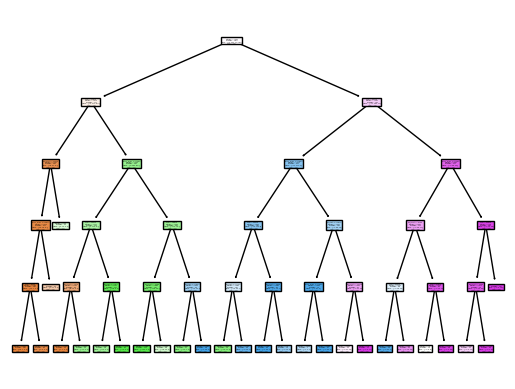

In [19]:
tree.plot_tree(dtree, feature_names = X.columns, class_names=True,filled = True)

Acurácia: 0.834
Precisão: 0.8424888632238905
Recall: 0.8374847411978332
F1-Score: 0.8367498913408544
Matriz de Confusão:


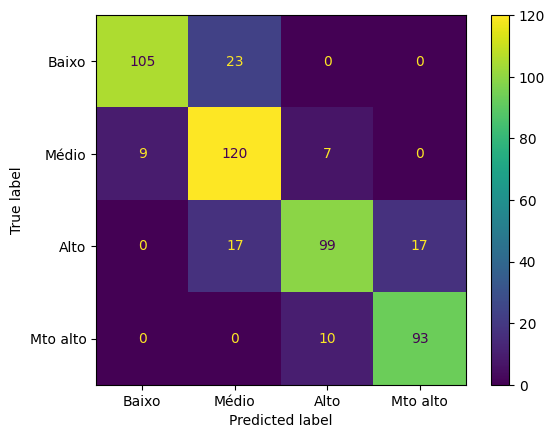

In [20]:
y_preddt1 = dtree.predict(X_test)
checkMetrics(y_test, y_preddt1, display=display_labels)

---

In [21]:
bigdtree = DecisionTreeClassifier(max_depth=10, criterion='entropy', min_samples_split=50).fit(X_train, y_train)

[Text(0.4816810344827586, 0.9444444444444444, 'ram <= 2231.5\nentropy = 1.999\nsamples = 1500\nvalue = [372, 364, 367, 397]\nclass = y[3]'),
 Text(0.1961206896551724, 0.8333333333333334, 'ram <= 1106.0\nentropy = 1.378\nsamples = 771\nvalue = [372, 317, 82, 0]\nclass = y[0]'),
 Text(0.10344827586206896, 0.7222222222222222, 'px_height <= 1231.5\nentropy = 0.491\nsamples = 346\nvalue = [309, 37, 0, 0]\nclass = y[0]'),
 Text(0.08620689655172414, 0.6111111111111112, 'battery_power <= 1837.0\nentropy = 0.318\nsamples = 312\nvalue = [294, 18, 0, 0]\nclass = y[0]'),
 Text(0.06896551724137931, 0.5, 'ram <= 833.0\nentropy = 0.168\nsamples = 282\nvalue = [275, 7, 0, 0]\nclass = y[0]'),
 Text(0.034482758620689655, 0.3888888888888889, 'px_width <= 1976.5\nentropy = 0.045\nsamples = 200\nvalue = [199, 1, 0, 0]\nclass = y[0]'),
 Text(0.017241379310344827, 0.2777777777777778, 'entropy = 0.0\nsamples = 197\nvalue = [197, 0, 0, 0]\nclass = y[0]'),
 Text(0.05172413793103448, 0.2777777777777778, 'entropy

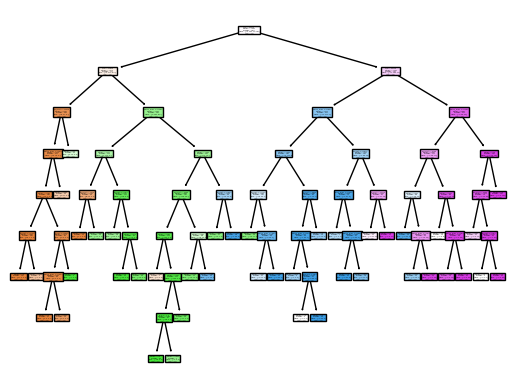

In [22]:
tree.plot_tree(bigdtree, feature_names = X.columns, class_names=True,filled = True)

Acurácia: 0.826
Precisão: 0.8334424756034925
Recall: 0.8275187657938751
F1-Score: 0.8296026426245255
Matriz de Confusão:


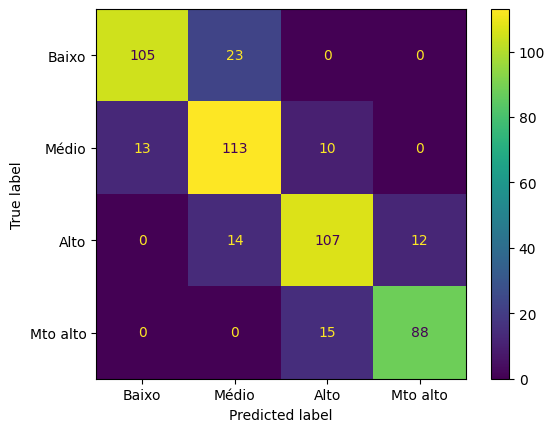

In [23]:
y_preddt2 = bigdtree.predict(X_test)
checkMetrics(y_test, y_preddt2, display_labels)

piorou! indicativo de overfitting

Observação: As previsões erradas são bem alinhadas com seus labels originais, por exemplo, não há ocasiões em que celulares de preços altos foram previstos tendo preços baixos, só de preços médios e muito altos



---


### **LEARNING THE DECISION TREE CLASSIFIER 2**

In [24]:
dtree2 = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=50).fit(X_train2, y_train2)

[Text(0.4895833333333333, 0.9166666666666666, 'ram <= 22.355\nentropy = 2.0\nsamples = 1500\nvalue = [360, 379, 379, 382]\nclass = y[3]'),
 Text(0.19791666666666666, 0.75, 'ram <= 11.03\nentropy = 1.408\nsamples = 782\nvalue = [360, 328, 94, 0]\nclass = y[0]'),
 Text(0.08333333333333333, 0.5833333333333334, 'px_width <= 13.325\nentropy = 0.487\nsamples = 331\nvalue = [296, 35, 0, 0]\nclass = y[0]'),
 Text(0.041666666666666664, 0.4166666666666667, 'battery_power <= 18.61\nentropy = 0.087\nsamples = 184\nvalue = [182, 2, 0, 0]\nclass = y[0]'),
 Text(0.020833333333333332, 0.25, 'entropy = 0.0\nsamples = 169\nvalue = [169, 0, 0, 0]\nclass = y[0]'),
 Text(0.0625, 0.25, 'entropy = 0.567\nsamples = 15\nvalue = [13, 2, 0, 0]\nclass = y[0]'),
 Text(0.125, 0.4166666666666667, 'battery_power <= 15.655\nentropy = 0.768\nsamples = 147\nvalue = [114, 33, 0, 0]\nclass = y[0]'),
 Text(0.10416666666666667, 0.25, 'ram <= 8.32\nentropy = 0.454\nsamples = 105\nvalue = [95, 10, 0, 0]\nclass = y[0]'),
 Text

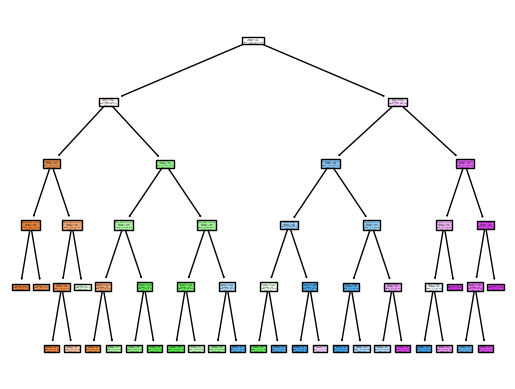

In [25]:
tree.plot_tree(dtree2, feature_names = X.columns, class_names=True,filled = True)

Acurácia: 0.832
Precisão: 0.8352747475750024
Recall: 0.8321075880975726
F1-Score: 0.8312058964597722
Matriz de Confusão:


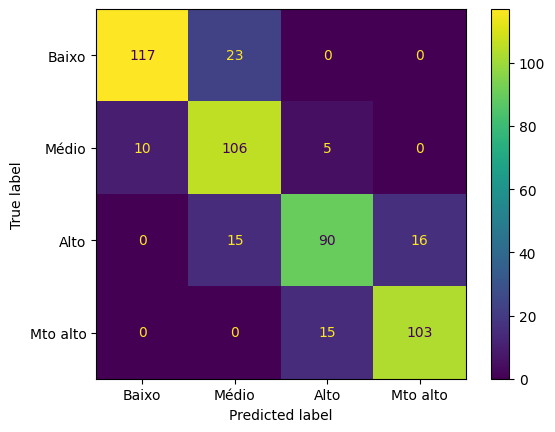

In [26]:
y_preddt1 = dtree2.predict(X_test2)
checkMetrics(y_test2, y_preddt1, display=display_labels)

---

In [27]:
bigdtree2 = DecisionTreeClassifier(max_depth=10, criterion='entropy', min_samples_split=50).fit(X_train2, y_train2)

[Text(0.5028935185185185, 0.9375, 'ram <= 22.355\nentropy = 2.0\nsamples = 1500\nvalue = [360, 379, 379, 382]\nclass = y[3]'),
 Text(0.20023148148148148, 0.8125, 'ram <= 11.03\nentropy = 1.408\nsamples = 782\nvalue = [360, 328, 94, 0]\nclass = y[0]'),
 Text(0.07407407407407407, 0.6875, 'px_width <= 13.325\nentropy = 0.487\nsamples = 331\nvalue = [296, 35, 0, 0]\nclass = y[0]'),
 Text(0.037037037037037035, 0.5625, 'battery_power <= 18.61\nentropy = 0.087\nsamples = 184\nvalue = [182, 2, 0, 0]\nclass = y[0]'),
 Text(0.018518518518518517, 0.4375, 'entropy = 0.0\nsamples = 169\nvalue = [169, 0, 0, 0]\nclass = y[0]'),
 Text(0.05555555555555555, 0.4375, 'entropy = 0.567\nsamples = 15\nvalue = [13, 2, 0, 0]\nclass = y[0]'),
 Text(0.1111111111111111, 0.5625, 'battery_power <= 15.655\nentropy = 0.768\nsamples = 147\nvalue = [114, 33, 0, 0]\nclass = y[0]'),
 Text(0.09259259259259259, 0.4375, 'ram <= 8.32\nentropy = 0.454\nsamples = 105\nvalue = [95, 10, 0, 0]\nclass = y[0]'),
 Text(0.07407407407

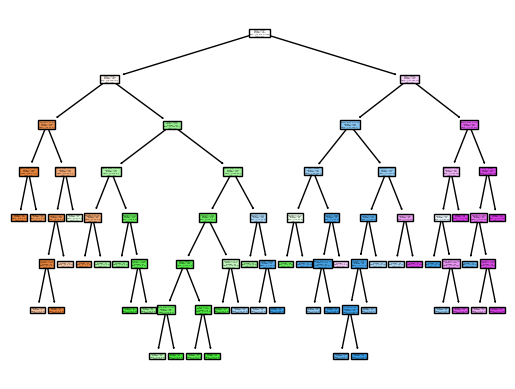

In [28]:
tree.plot_tree(bigdtree2, feature_names = X.columns, class_names=True,filled = True)

Acurácia: 0.832
Precisão: 0.8347600366267215
Recall: 0.8321075880975727
F1-Score: 0.8317705990741233
Matriz de Confusão:


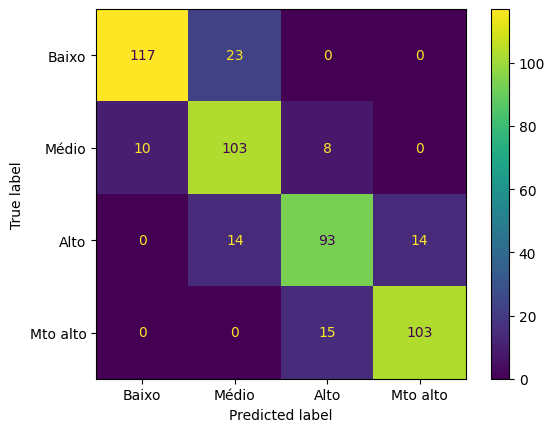

In [29]:
y_preddt2 = bigdtree2.predict(X_test2)
checkMetrics(y_test2, y_preddt2, display_labels)



---


### **LEARNING THE DECISION TREE CLASSIFIER 3**

In [30]:
dtree3 = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=50).fit(X_train3, y_train3)

[Text(0.5487804878048781, 0.9166666666666666, 'battery_power <= 13.555\nentropy = 2.0\nsamples = 1500\nvalue = [368, 372, 372, 388]\nclass = y[3]'),
 Text(0.2926829268292683, 0.75, 'px_width <= 14.715\nentropy = 1.972\nsamples = 861\nvalue = [264, 233, 213, 151]\nclass = y[0]'),
 Text(0.13414634146341464, 0.5833333333333334, 'battery_power <= 6.755\nentropy = 1.91\nsamples = 560\nvalue = [206, 154, 128, 72]\nclass = y[0]'),
 Text(0.04878048780487805, 0.4166666666666667, 'px_height <= 3.49\nentropy = 1.797\nsamples = 119\nvalue = [41, 29, 42, 7]\nclass = y[2]'),
 Text(0.024390243902439025, 0.25, 'entropy = 1.476\nsamples = 49\nvalue = [22, 8, 19, 0]\nclass = y[0]'),
 Text(0.07317073170731707, 0.25, 'm_dep <= 0.25\nentropy = 1.892\nsamples = 70\nvalue = [19, 21, 23, 7]\nclass = y[2]'),
 Text(0.04878048780487805, 0.08333333333333333, 'entropy = 1.538\nsamples = 29\nvalue = [9, 7, 13, 0]\nclass = y[2]'),
 Text(0.0975609756097561, 0.08333333333333333, 'entropy = 1.958\nsamples = 41\nvalue =

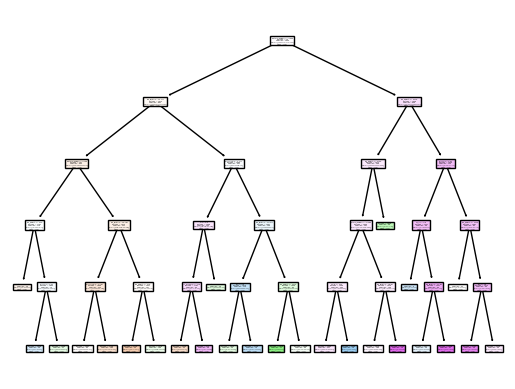

In [31]:
tree.plot_tree(dtree3, feature_names = X.columns, class_names=True,filled = True)

Acurácia: 0.266
Precisão: 0.25485872109348734
Recall: 0.271585836038961
F1-Score: 0.25051024805432587
Matriz de Confusão:


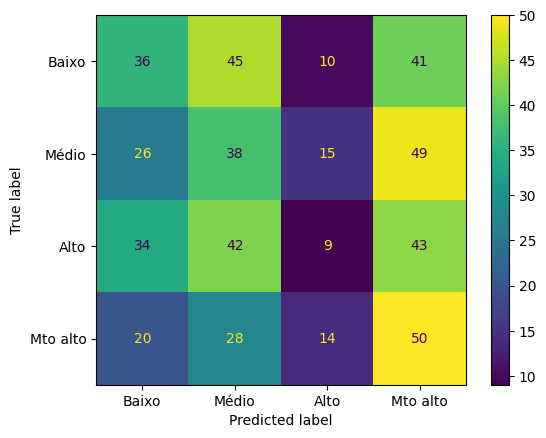

In [32]:
y_preddt1 = dtree3.predict(X_test3)
checkMetrics(y_test3, y_preddt1, display=display_labels)

---

In [33]:
bigdtree3 = DecisionTreeClassifier(max_depth=10, criterion='entropy', min_samples_split=50).fit(X_train3, y_train3)

[Text(0.58203125, 0.9545454545454546, 'battery_power <= 13.555\nentropy = 2.0\nsamples = 1500\nvalue = [368, 372, 372, 388]\nclass = y[3]'),
 Text(0.3203125, 0.8636363636363636, 'px_width <= 14.715\nentropy = 1.972\nsamples = 861\nvalue = [264, 233, 213, 151]\nclass = y[0]'),
 Text(0.14955357142857142, 0.7727272727272727, 'battery_power <= 6.755\nentropy = 1.91\nsamples = 560\nvalue = [206, 154, 128, 72]\nclass = y[0]'),
 Text(0.03571428571428571, 0.6818181818181818, 'px_height <= 3.49\nentropy = 1.797\nsamples = 119\nvalue = [41, 29, 42, 7]\nclass = y[2]'),
 Text(0.017857142857142856, 0.5909090909090909, 'entropy = 1.476\nsamples = 49\nvalue = [22, 8, 19, 0]\nclass = y[0]'),
 Text(0.05357142857142857, 0.5909090909090909, 'm_dep <= 0.25\nentropy = 1.892\nsamples = 70\nvalue = [19, 21, 23, 7]\nclass = y[2]'),
 Text(0.03571428571428571, 0.5, 'entropy = 1.538\nsamples = 29\nvalue = [9, 7, 13, 0]\nclass = y[2]'),
 Text(0.07142857142857142, 0.5, 'entropy = 1.958\nsamples = 41\nvalue = [10, 

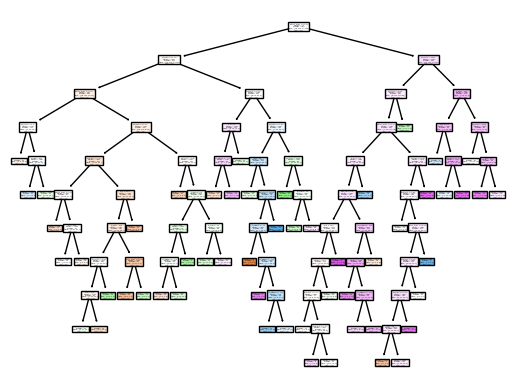

In [34]:
tree.plot_tree(bigdtree3, feature_names = X.columns, class_names=True,filled = True)

Acurácia: 0.236
Precisão: 0.23592625772574183
Recall: 0.23477238906926406
F1-Score: 0.2350214290142842
Matriz de Confusão:


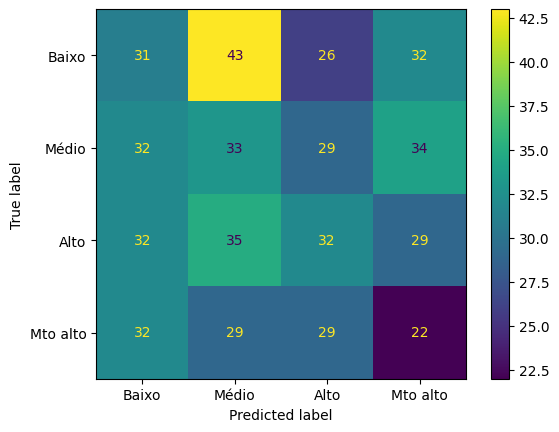

In [35]:
y_preddt = bigdtree3.predict(X_test3)
checkMetrics(y_test3, y_preddt2, display_labels)

---
---

## **Random Forests**

###**LEARNING THE RF CLASSIFIER**

In [36]:
rforest = RandomForestClassifier(max_depth=10).fit(X_train, y_train)

Acurácia: 0.892
Precisão: 0.8959239404006846
Recall: 0.8933047254415307
F1-Score: 0.8943305097446217
Matriz de Confusão:


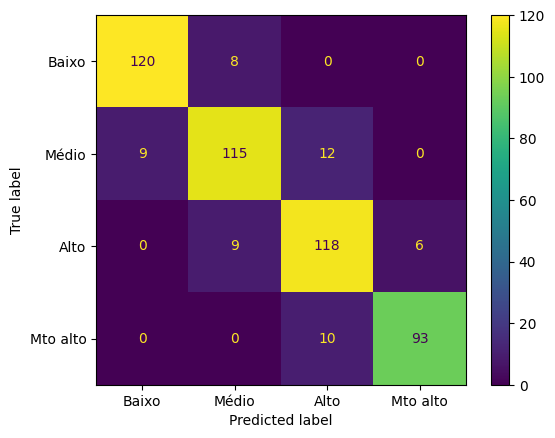

In [37]:
y_predrf = rforest.predict(X_test)
checkMetrics(y_test, y_predrf, display_labels)

---
###**LEARNING THE RF CLASSIFIER 2**

In [38]:
rforest2 = RandomForestClassifier(max_depth=10).fit(X_train2, y_train2)

Acurácia: 0.89
Precisão: 0.8900777409524656
Recall: 0.8893607548075961
F1-Score: 0.8885088424885548
Matriz de Confusão:


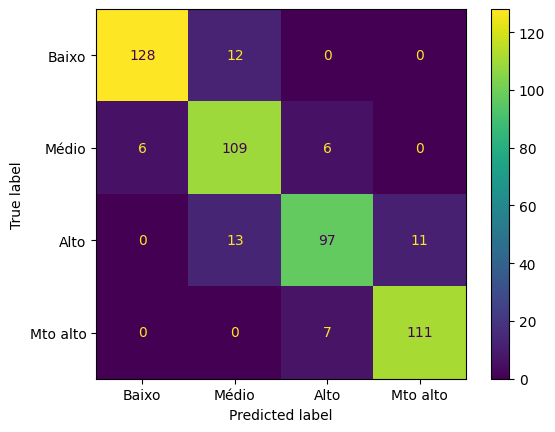

In [39]:
y_predrf = rforest2.predict(X_test2)
checkMetrics(y_test2, y_predrf, display_labels)

---
###**LEARNING THE RF CLASSIFIER 3**

In [40]:
rforest3 = RandomForestClassifier(max_depth=10).fit(X_train3, y_train3)

Acurácia: 0.288
Precisão: 0.27897254667241733
Recall: 0.291108630952381
F1-Score: 0.275876991832593
Matriz de Confusão:


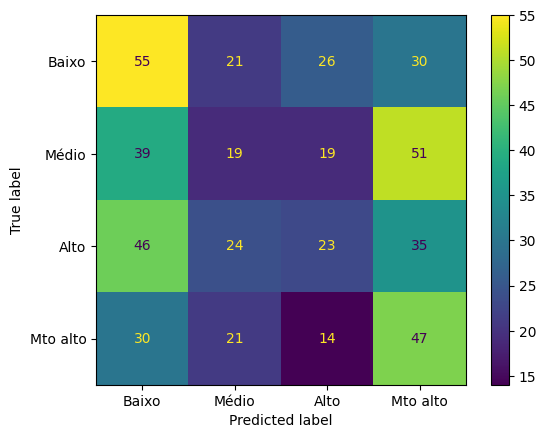

In [41]:
y_predrf = rforest3.predict(X_test3)
checkMetrics(y_test3, y_predrf, display_labels)

---
---
## **KNNs**

### **LEARNING THE KNN CLASSIFIER**

13


<Axes: >

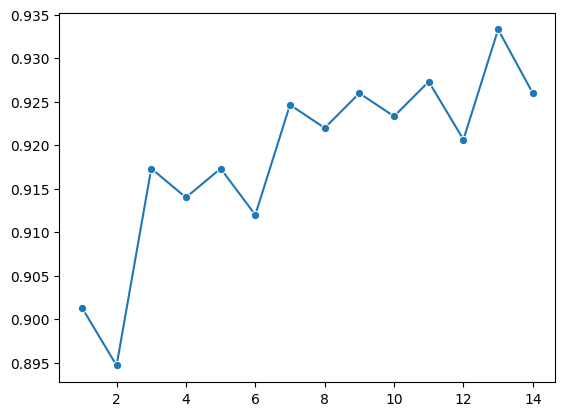

In [42]:
k_values = [i for i in range(1,15)]
scores = []

for k in k_values:
  tknn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(tknn, X_train, y_train, cv=5)
  scores.append(np.mean(score))
  if(scores[-1] >= max(scores)):
    k_best = k

print(k_best)
sns.lineplot(x=k_values,y=scores, marker ='o')

In [43]:
knn = KNeighborsClassifier(n_neighbors=k_best).fit(X_train, y_train)

Acurácia: 0.938
Precisão: 0.9397334808049094
Recall: 0.9369453525214378
F1-Score: 0.9381276387963078
Matriz de Confusão:


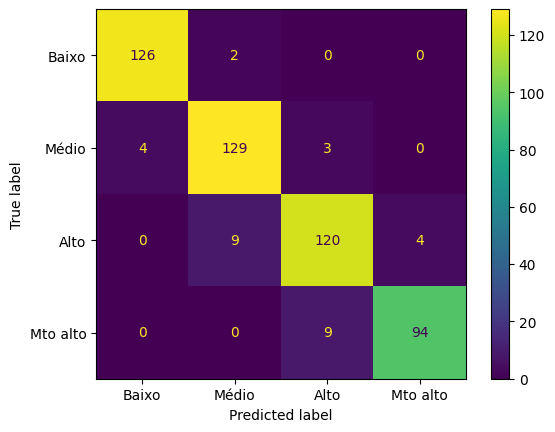

In [44]:
y_predknn = knn.predict(X_test)
checkMetrics(y_test, y_predknn, display_labels)

---
###**LEARNING THE KNN CLASSIFIER 2**

14


<Axes: >

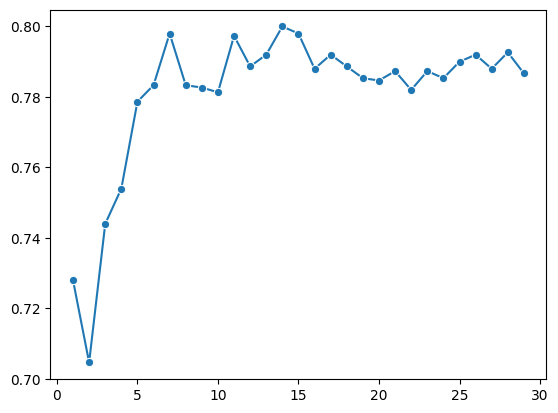

In [45]:
k_values = [i for i in range(1,30)]
scores = []

for k in k_values:
  tknn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(tknn, X_train2, y_train2, cv=5)
  scores.append(np.mean(score))
  if(scores[-1] >= max(scores)):
    k_best = k

print(k_best)
sns.lineplot(x=k_values,y=scores, marker ='o')

In [46]:
knn2 = KNeighborsClassifier(n_neighbors=k_best).fit(X_train2, y_train2)

Acurácia: 0.814
Precisão: 0.8136865726663546
Recall: 0.8104458907810218
F1-Score: 0.8116083315227037
Matriz de Confusão:


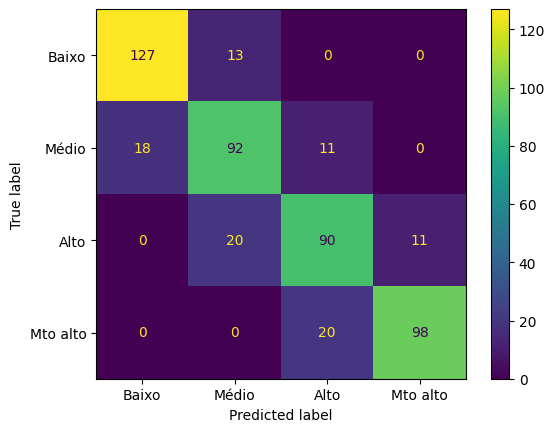

In [47]:
y_predknn = knn2.predict(X_test2)
checkMetrics(y_test2, y_predknn, display_labels)

---

### **LEARNING THE KNN CLASSIFIER 3**

9


<Axes: >

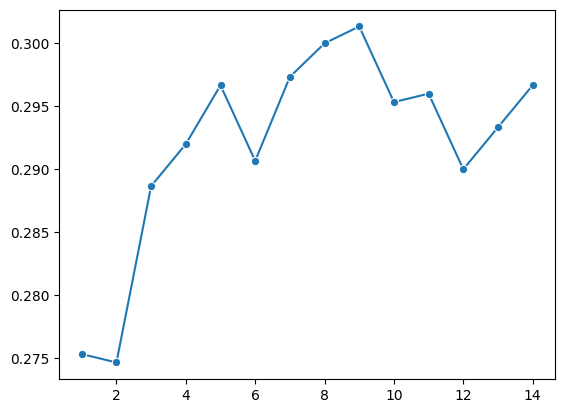

In [48]:
k_values = [i for i in range(1,15)]
scores = []

for k in k_values:
  tknn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(tknn, X_train3, y_train3, cv=5)
  scores.append(np.mean(score))
  if(scores[-1] >= max(scores)):
    k_best = k

print(k_best)
sns.lineplot(x=k_values,y=scores, marker ='o')

In [49]:
knn3 = KNeighborsClassifier(n_neighbors=k_best).fit(X_train3, y_train3)

Acurácia: 0.246
Precisão: 0.23991551050782628
Recall: 0.24417444534632038
F1-Score: 0.23627053692706723
Matriz de Confusão:


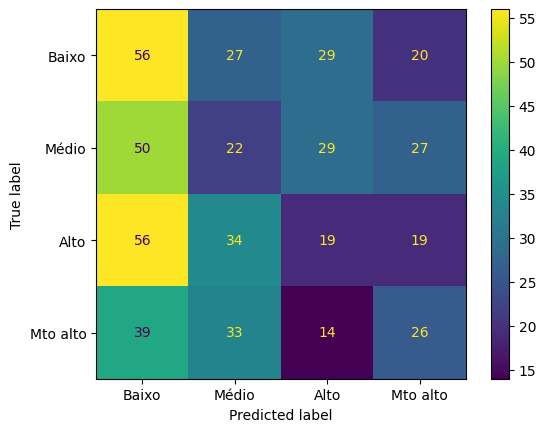

In [51]:
y_predknn = knn3.predict(X_test3)
checkMetrics(y_test3, y_predknn, display_labels)

---
---
## **MLPs**

###**LEARNING THE MLP CLASSIFIER**

In [52]:
seed = randint(0, 4294967295)
#seed = 4262000293
mlp = MLPClassifier(learning_rate_init=0.001, alpha=0.1, random_state=seed, max_iter=1000).fit(X_train, y_train)
#mlp = MLPClassifier(solver='lbfgs', random_state=seed, max_fun=30000).fit(X_train, y_train)

<Axes: >

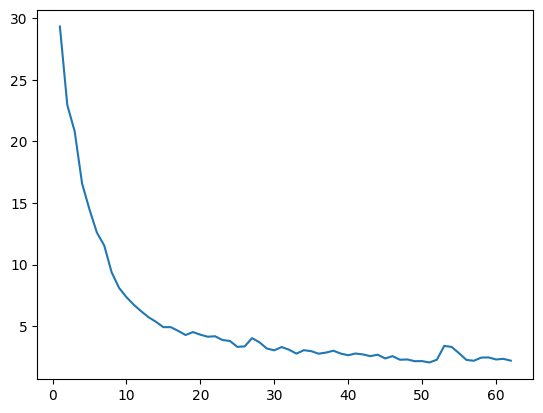

In [53]:
sns.lineplot(y=mlp.loss_curve_, x=range(1, mlp.n_iter_ + 1))

Acurácia: 0.646
Precisão: 0.645407174624966
Recall: 0.6550395695612174
F1-Score: 0.6380076156937394
Matriz de Confusão:


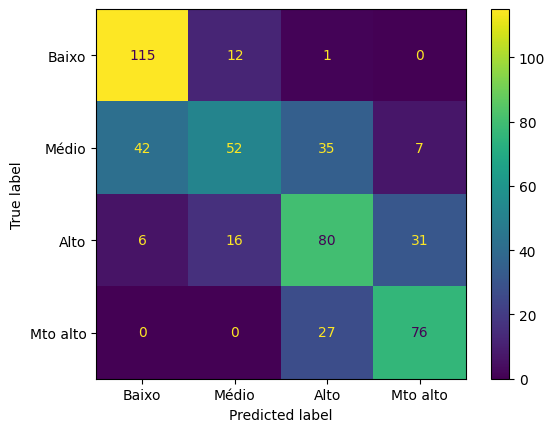

No layers: 3


MLPClassifier(alpha=0.1, max_iter=1000, random_state=223908794)

In [54]:
y_predmlp = mlp.predict(X_test)
checkMetrics(y_test, y_predmlp, display_labels)
print("No layers:", mlp.n_layers_)
mlp

---
###**LEARNING THE MLP CLASSIFIER 2**

In [55]:
seed = randint(0, 4294967295)
#seed = 4262000293
mlp2 = MLPClassifier(learning_rate_init=0.05, alpha=0.5, random_state=seed, early_stopping=True, max_iter=1000).fit(X_train2, y_train2)
#mlp = MLPClassifier(solver='lbfgs', random_state=seed, max_fun=30000).fit(X_train, y_train)

<Axes: >

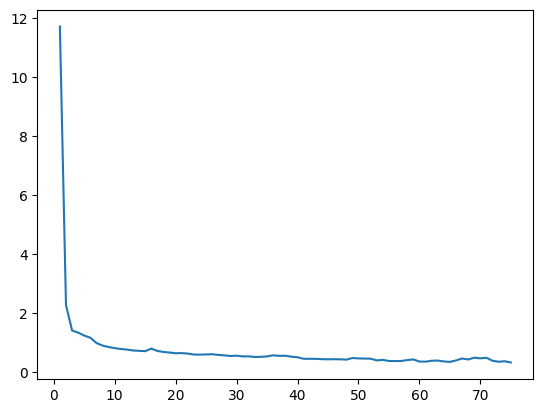

In [56]:
sns.lineplot(y=mlp2.loss_curve_, x=range(1, mlp2.n_iter_ + 1))

Acurácia: 0.882
Precisão: 0.8842223024903176
Recall: 0.8780473955936205
F1-Score: 0.8791829610949073
Matriz de Confusão:


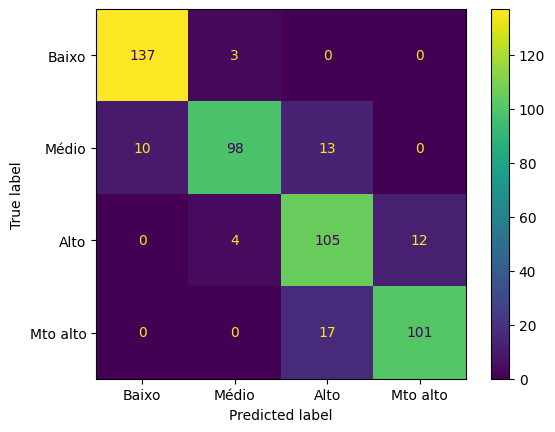

No layers: 3


MLPClassifier(alpha=0.5, early_stopping=True, learning_rate_init=0.05,
              max_iter=1000, random_state=781670009)

In [57]:
y_predmlp = mlp2.predict(X_test2)
checkMetrics(y_test2, y_predmlp, display_labels)
print("No layers:", mlp2.n_layers_)
mlp2

---
###**LEARNING THE MLP CLASSIFIER 3**

In [67]:
seed = randint(0, 4294967295)
#seed = 4262000293
mlp3 = MLPClassifier(learning_rate_init=0.005, alpha=0.5, random_state=seed, early_stopping=True, max_iter=1000).fit(X_train3, y_train3)
#mlp = MLPClassifier(solver='lbfgs', random_state=seed, max_fun=30000).fit(X_train, y_train)

<Axes: >

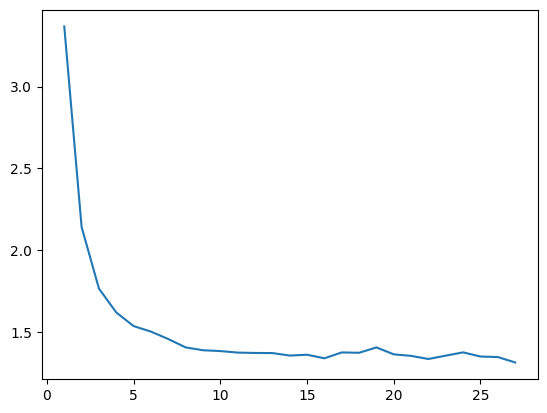

In [68]:
sns.lineplot(y=mlp3.loss_curve_, x=range(1, mlp3.n_iter_ + 1))

Acurácia: 0.278
Precisão: 0.3077584302524564
Recall: 0.27554281655844154
F1-Score: 0.2585312337555854
Matriz de Confusão:


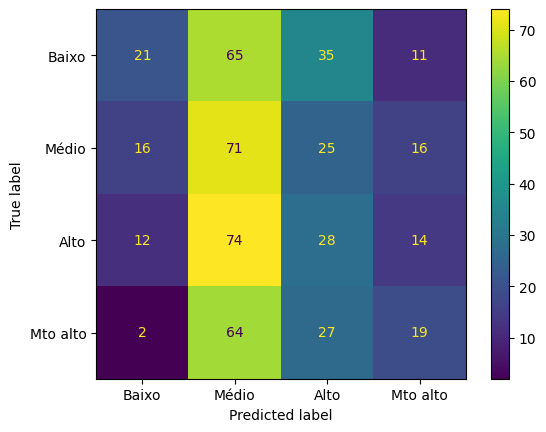

No layers: 3


MLPClassifier(alpha=0.5, early_stopping=True, learning_rate_init=0.005,
              max_iter=1000, random_state=2189405953)

In [69]:
y_predmlp = mlp3.predict(X_test3)
checkMetrics(y_test3, y_predmlp, display_labels)
print("No layers:", mlp3.n_layers_)
mlp3

---
---
# PFIs + PDPs

Todos os PFIs foram plotados foram nessa ordem: o 1o é de um modelo treinado com dataset original e o 2o é de um modelo treinado com o dataset com features escaladas. Todos os modelos (menos os MLPs) foram treinados com os mesmos hiperparâmetros para ser feita uma análise da diferença entre esses modelos.

In [70]:
xtrains = (X_train, X_train2, X_train3)

---
### dtree

In [71]:
dtrees = (dtree, dtree2, dtree3)

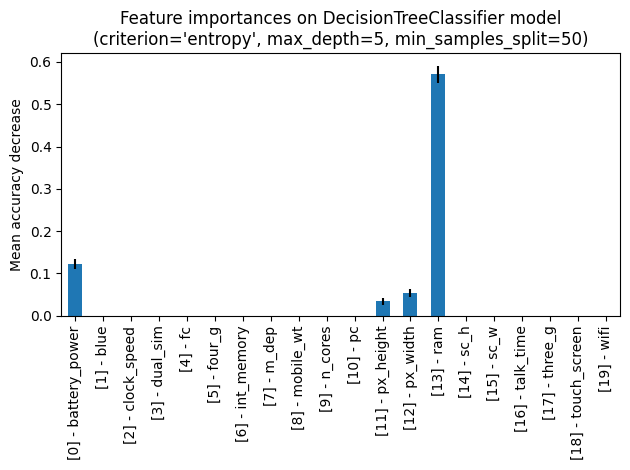

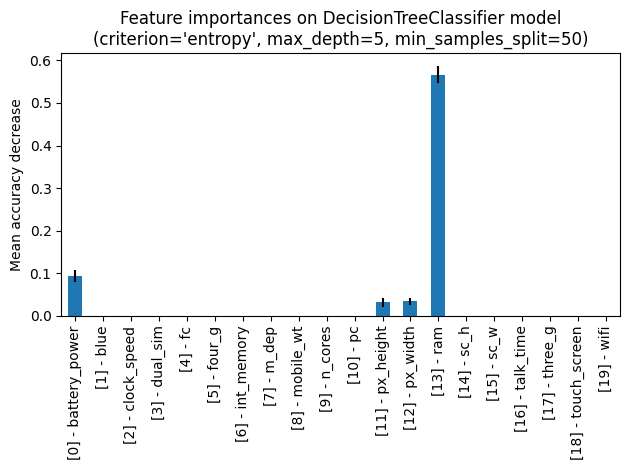

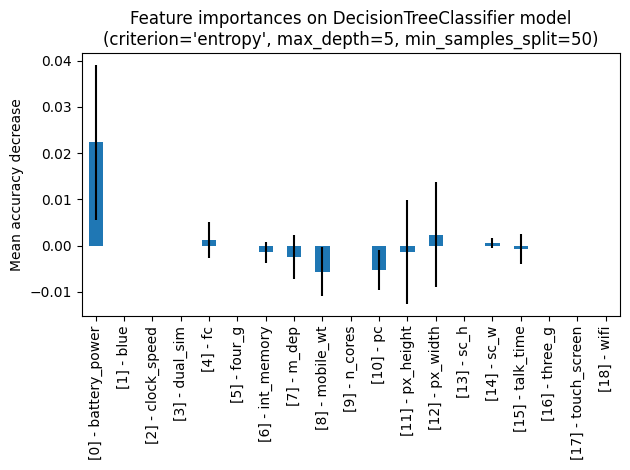

In [72]:
pfi(dtree, X_test, y_test)
pfi(dtree2, X_test2, y_test2)
pfi(dtree3, X_test3, y_test3)


DecisionTreeClassifier 1:


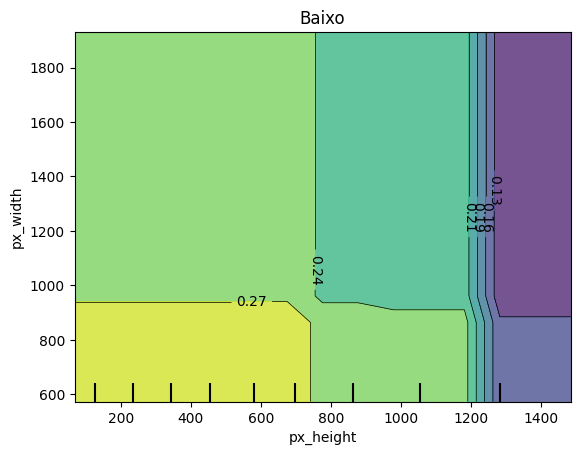


DecisionTreeClassifier 2:


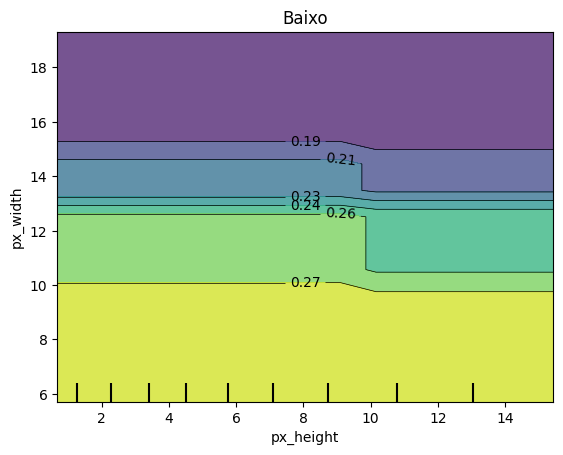


DecisionTreeClassifier 3:


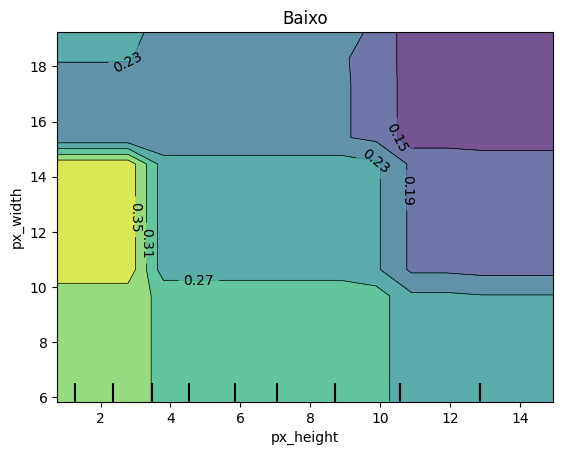


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


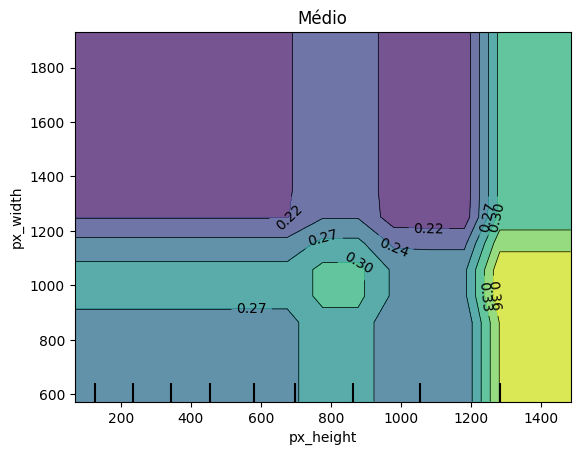


DecisionTreeClassifier 2:


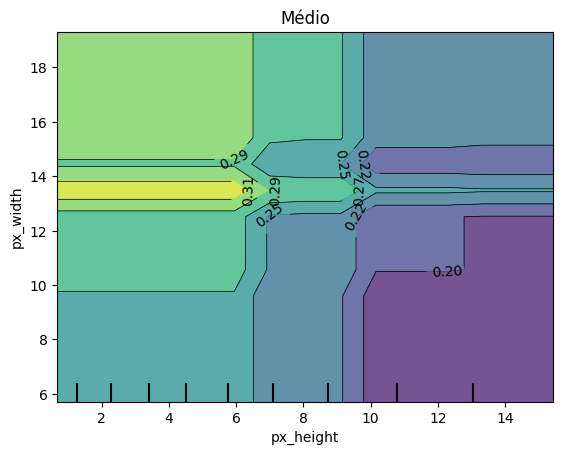


DecisionTreeClassifier 3:


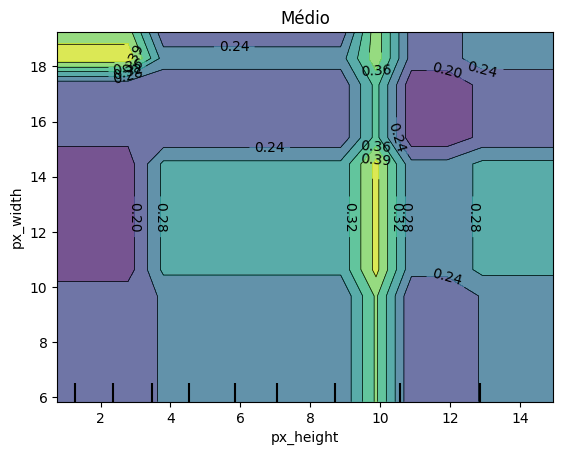


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


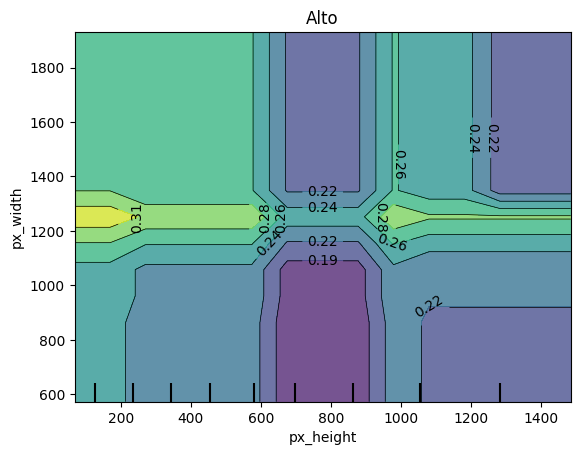


DecisionTreeClassifier 2:


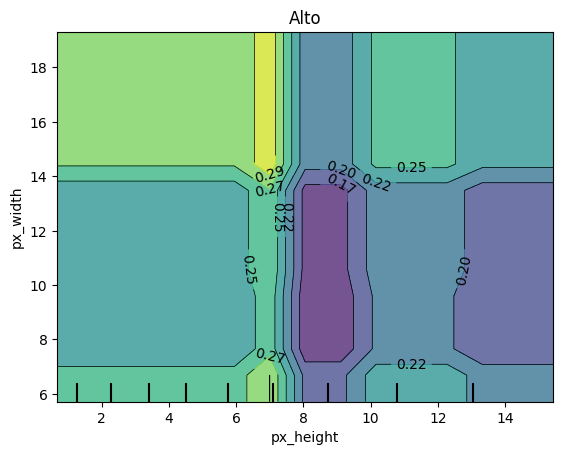


DecisionTreeClassifier 3:


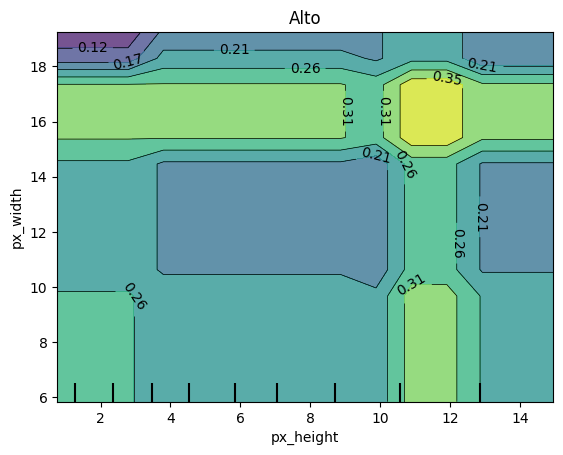


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


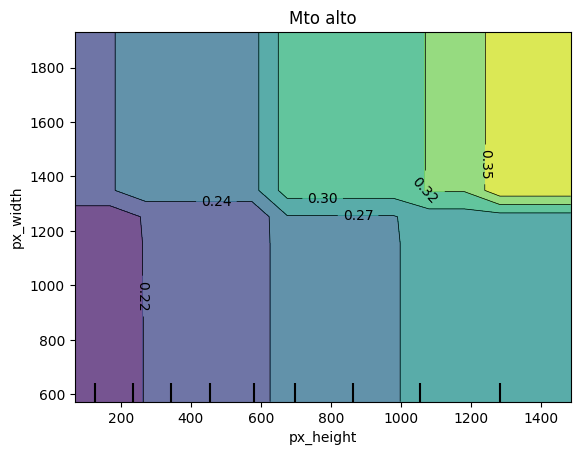


DecisionTreeClassifier 2:


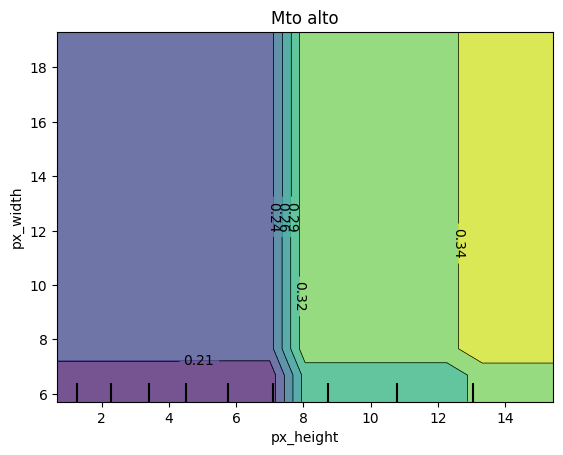


DecisionTreeClassifier 3:


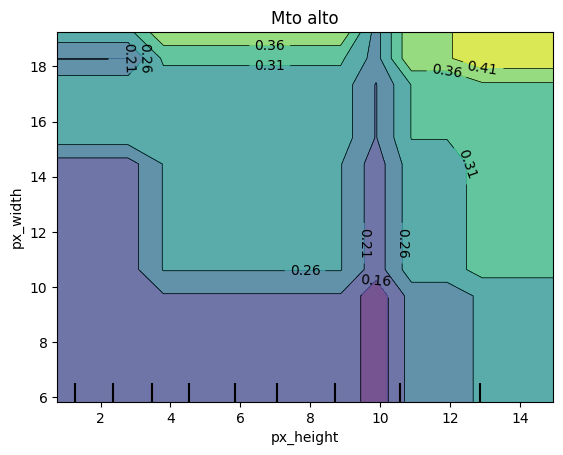


------------------------------------------------------------
------------------------------------------------------------


In [73]:
# px_height, px_width
pdp2versions(dtrees, xtrains, [(11,12)], 15)


DecisionTreeClassifier 1:


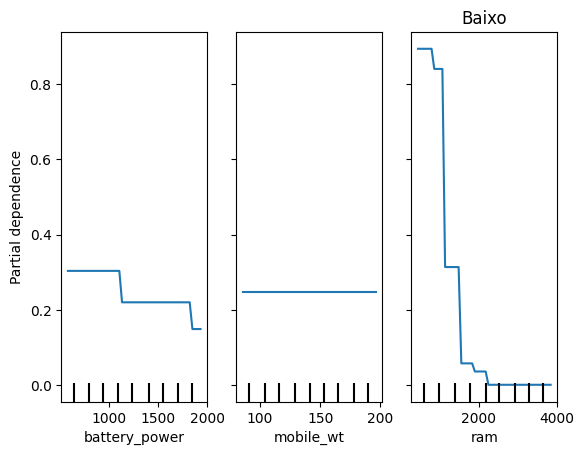

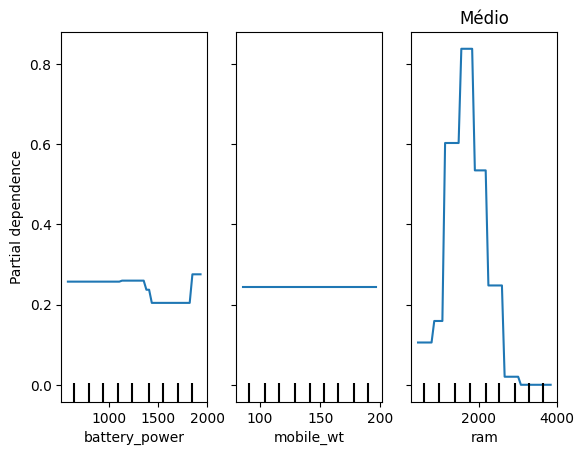

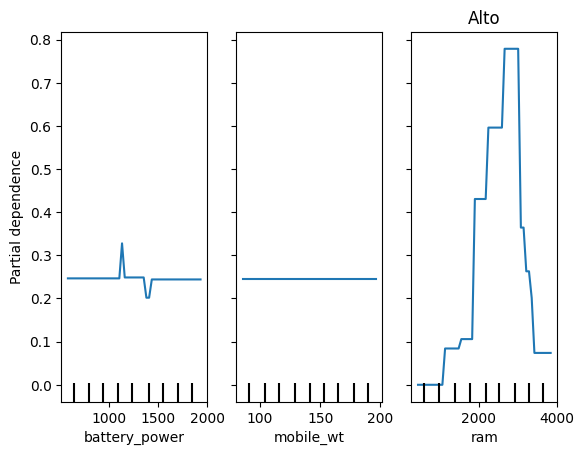

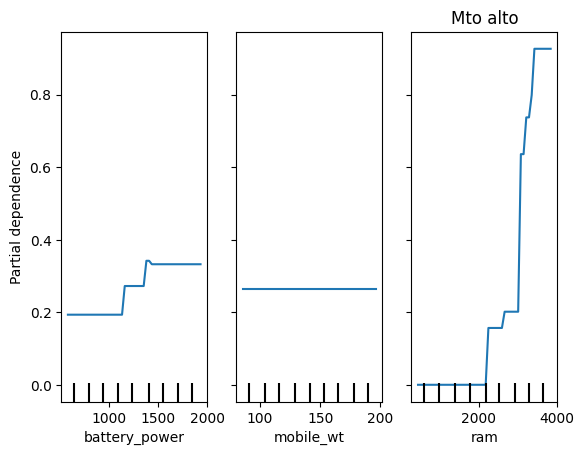


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 2:


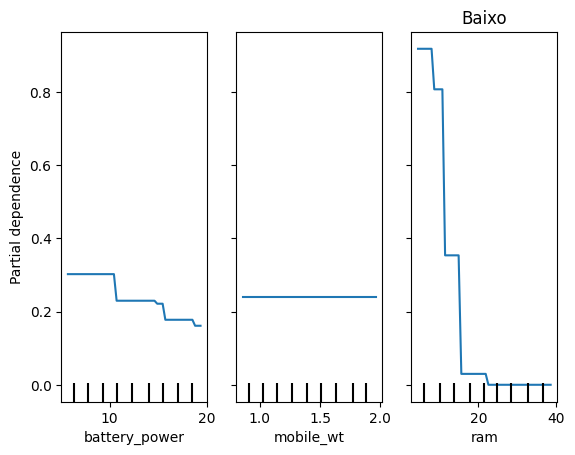

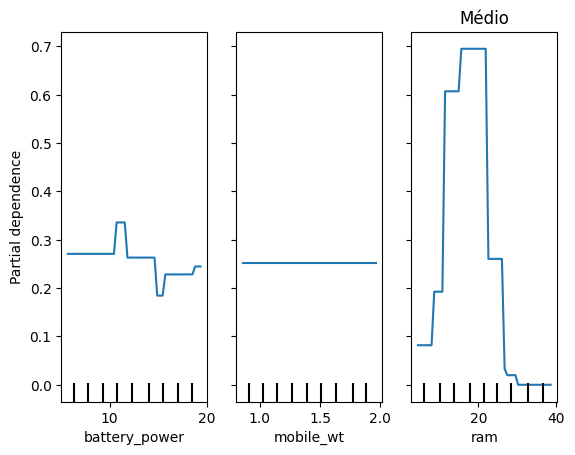

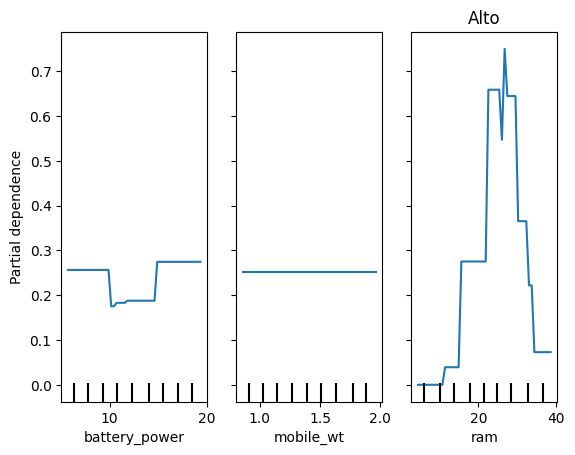

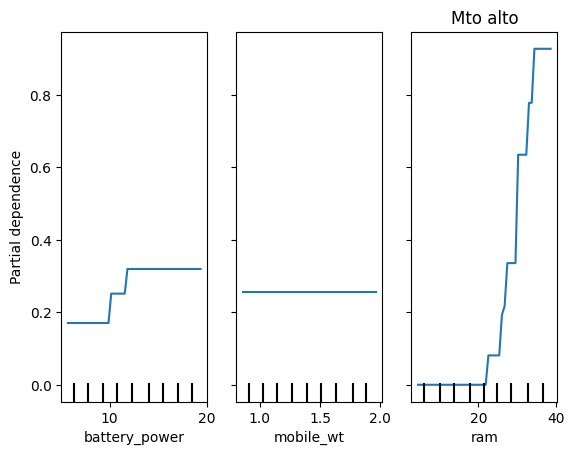


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 3:


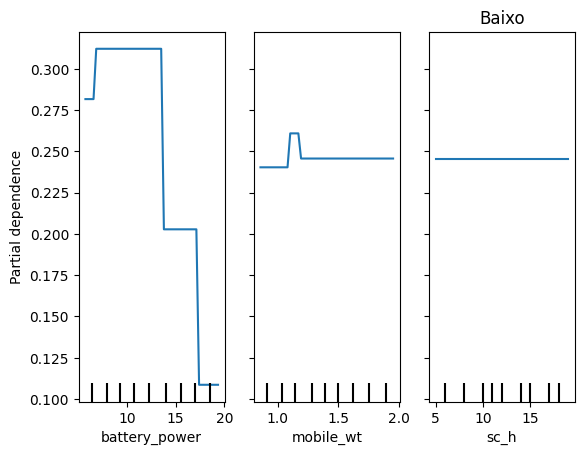

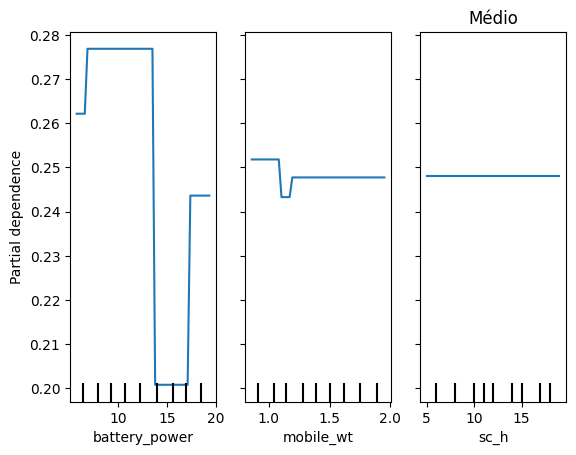

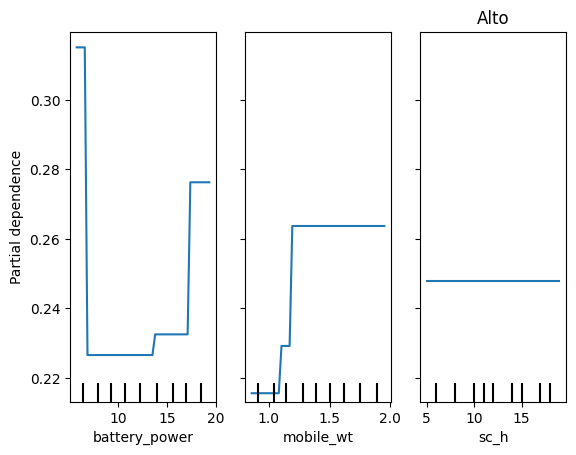

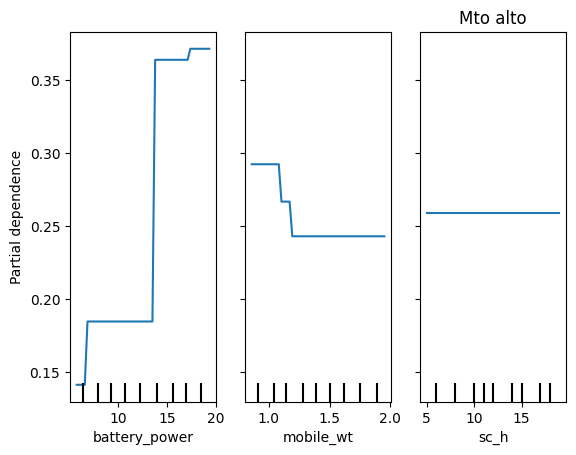


------------------------------------------------------------
------------------------------------------------------------


In [74]:
pdp2versions(dtrees, xtrains, [0,8,13], 50, axis=1)

---

In [75]:
bigdtrees = (bigdtree, bigdtree2, bigdtree3)

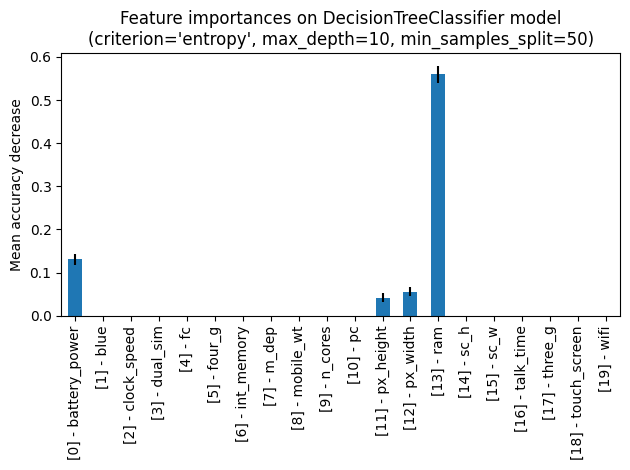

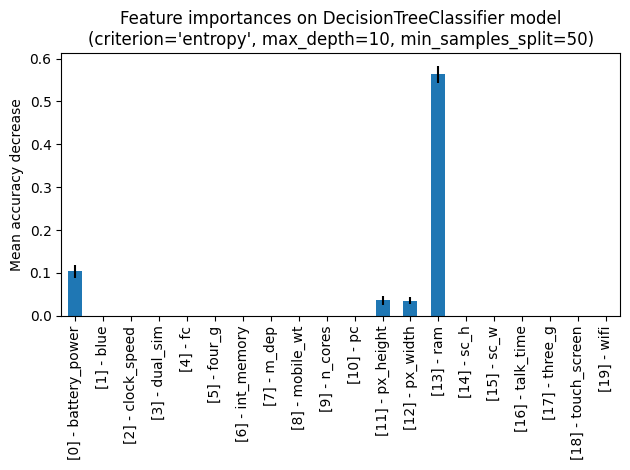

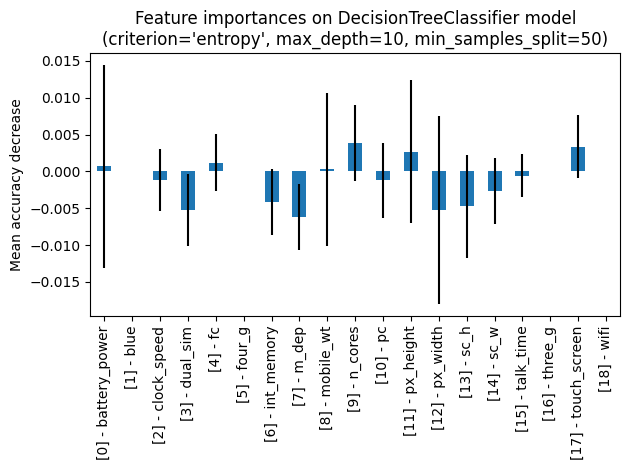

In [76]:
pfi(bigdtree, X_test, y_test)
pfi(bigdtree2, X_test2, y_test2)
pfi(bigdtree3, X_test3, y_test3)


DecisionTreeClassifier 1:


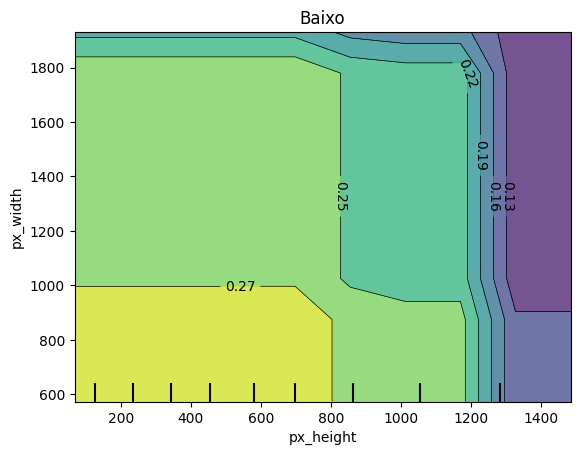

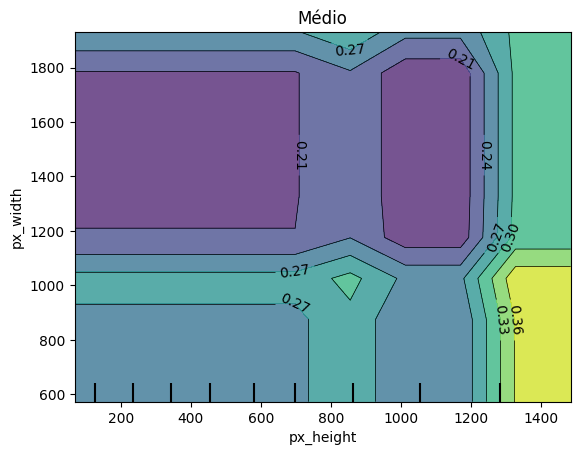

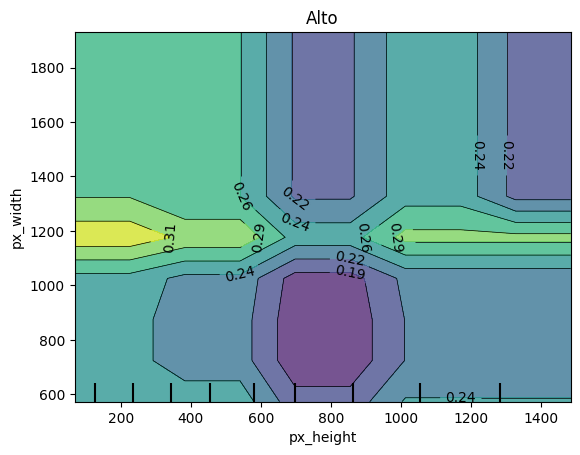

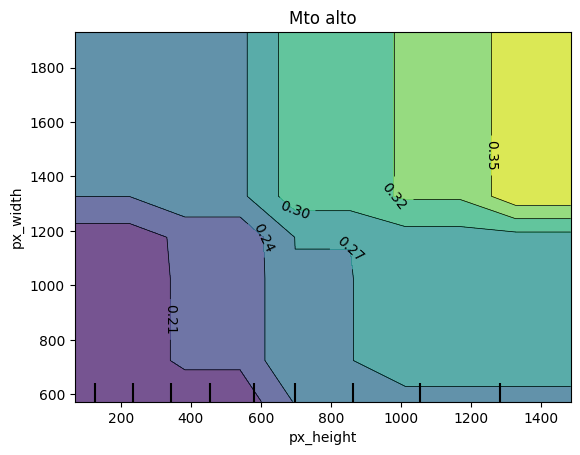


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 2:


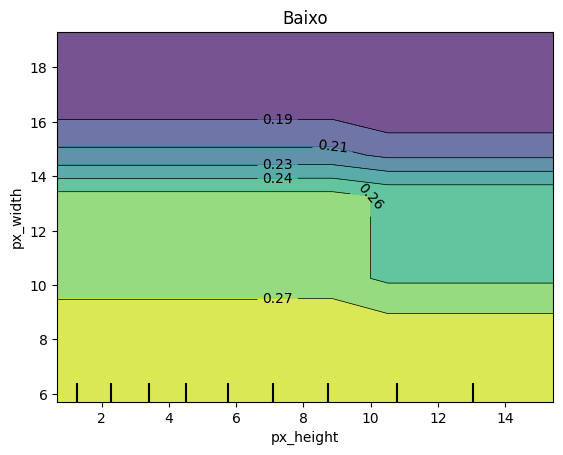

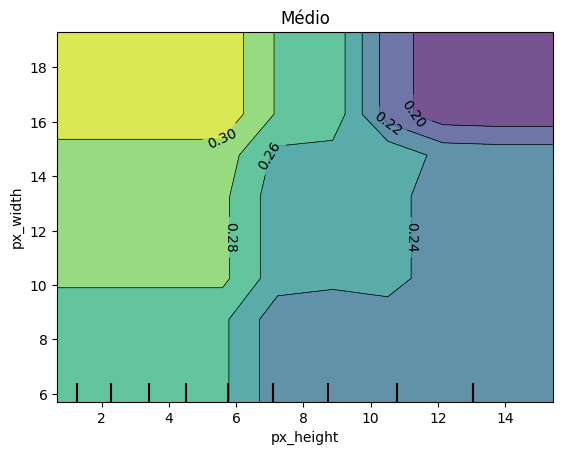

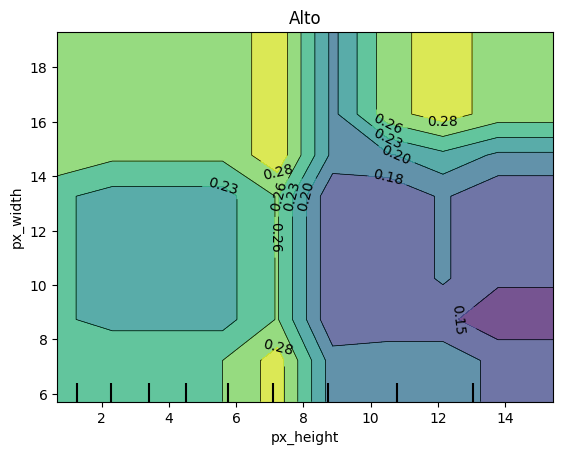

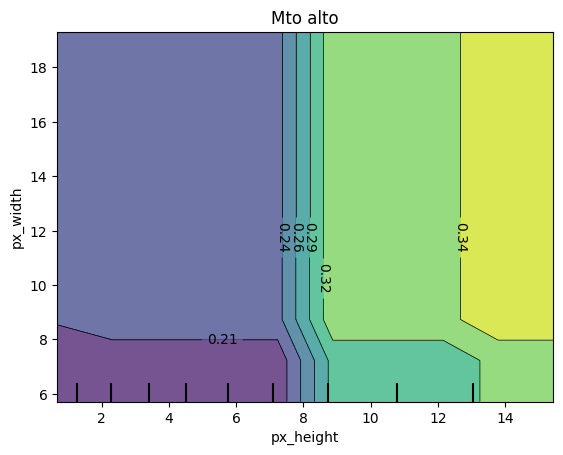


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 3:


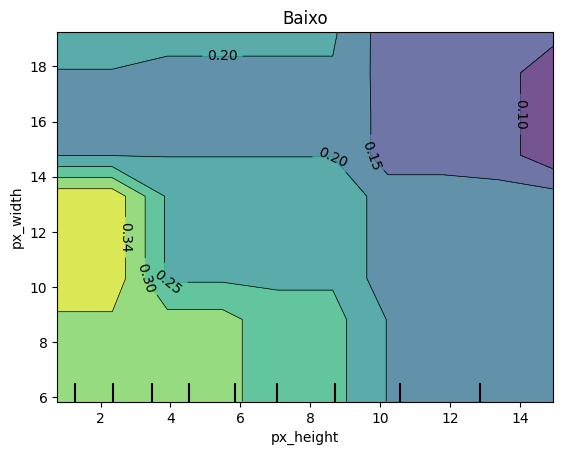

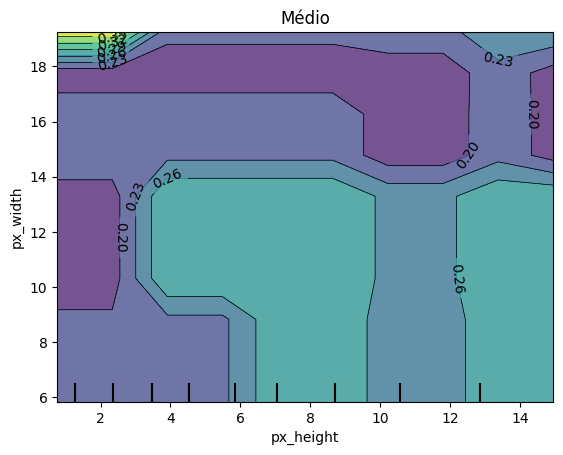

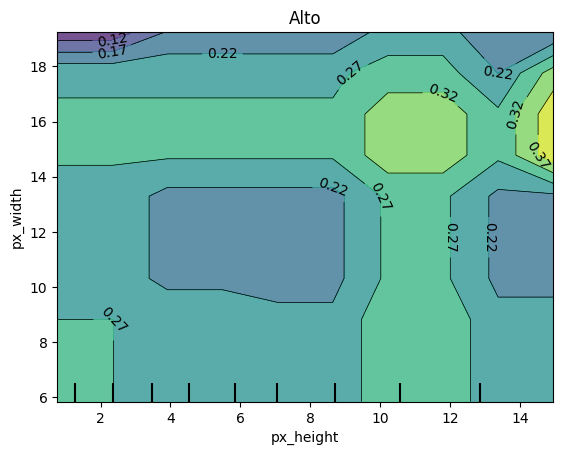

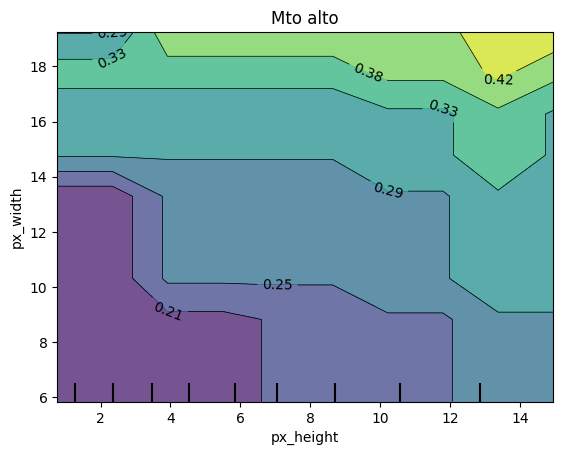


------------------------------------------------------------
------------------------------------------------------------


In [77]:
# px_height, px_width
pdp2versions(bigdtrees, xtrains, [(11, 12)], axis=1)


DecisionTreeClassifier 1:


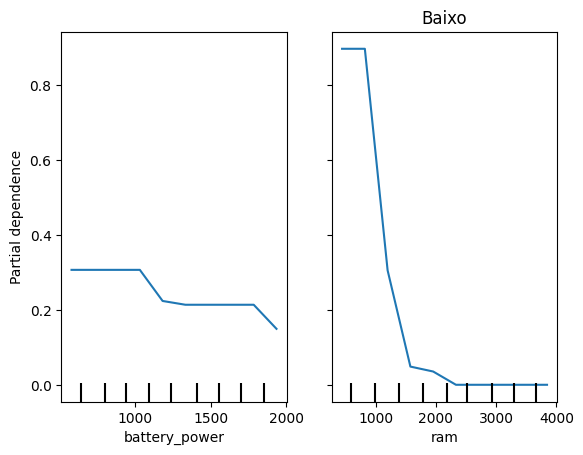


DecisionTreeClassifier 2:


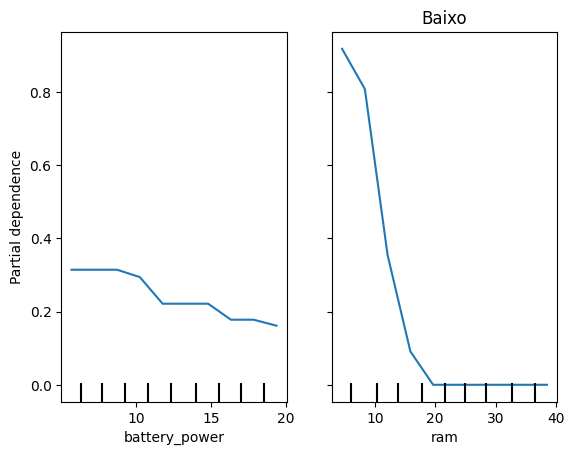


DecisionTreeClassifier 3:


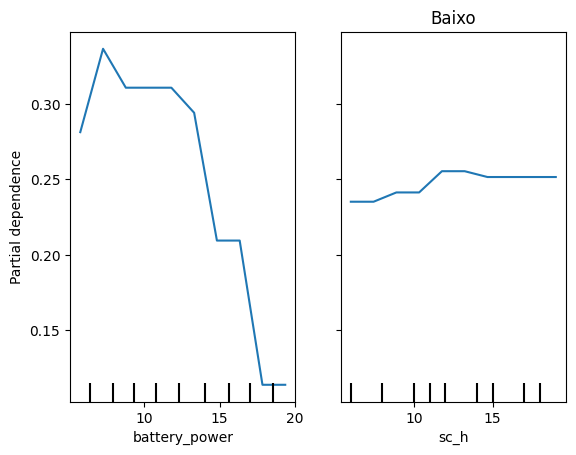


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


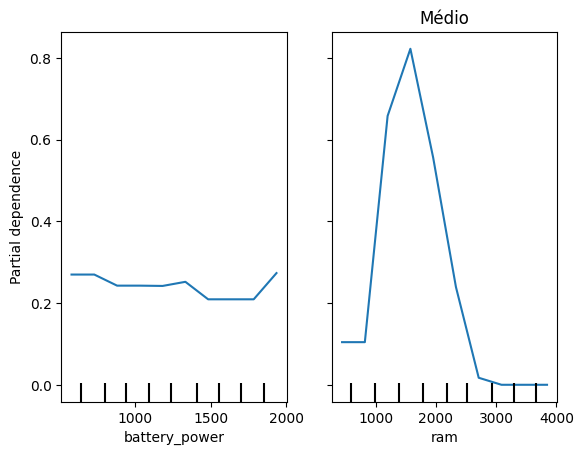


DecisionTreeClassifier 2:


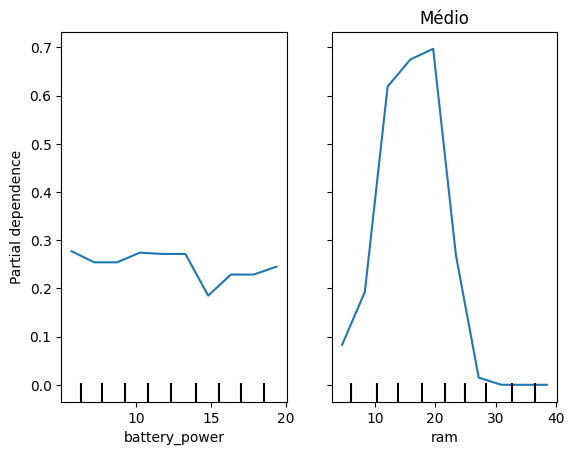


DecisionTreeClassifier 3:


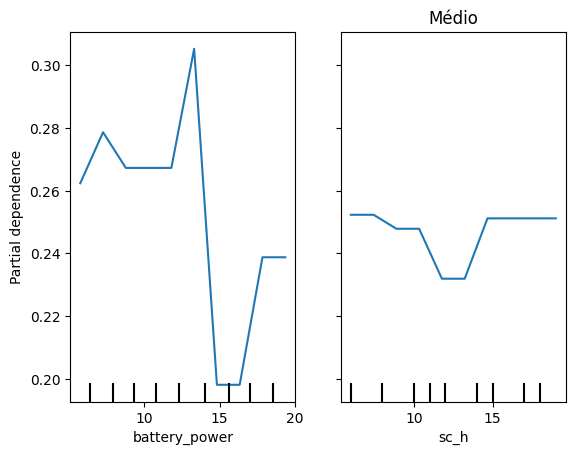


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


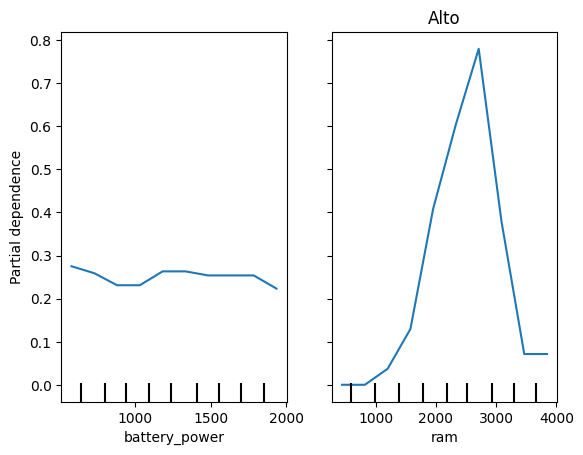


DecisionTreeClassifier 2:


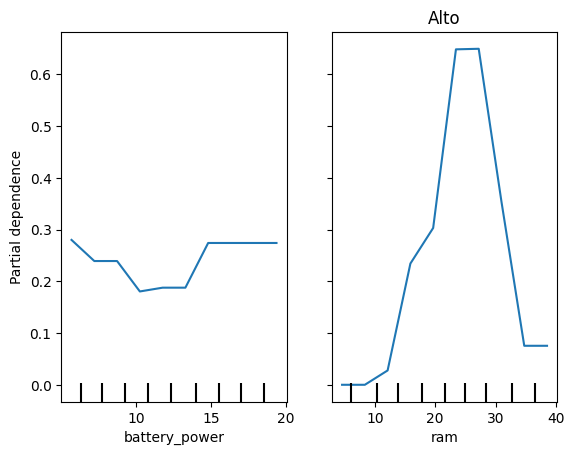


DecisionTreeClassifier 3:


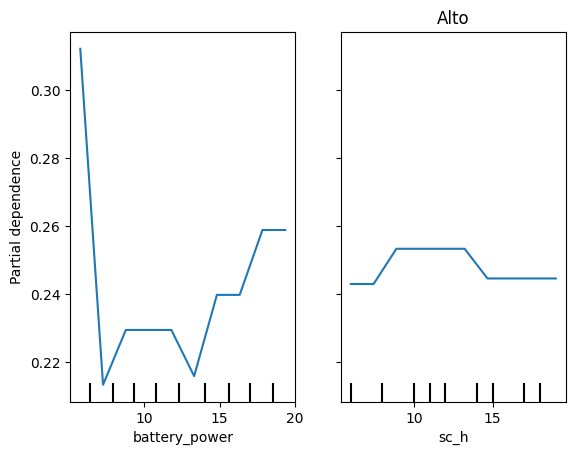


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


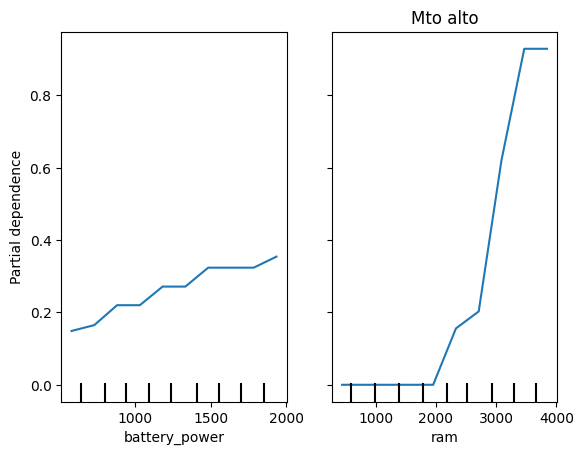


DecisionTreeClassifier 2:


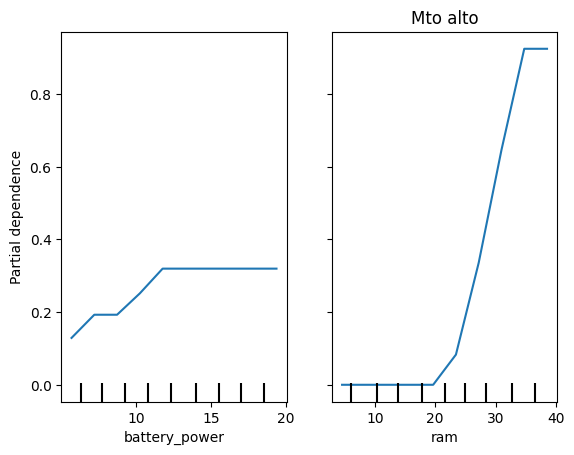


DecisionTreeClassifier 3:


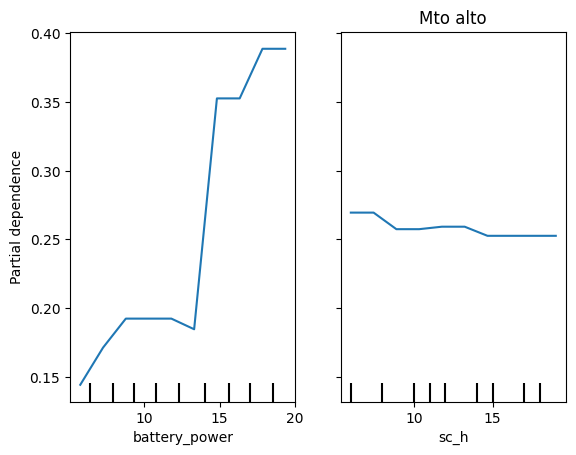


------------------------------------------------------------
------------------------------------------------------------


In [78]:
pdp2versions(bigdtrees, xtrains, [0, 13])

---


DecisionTreeClassifier 1:


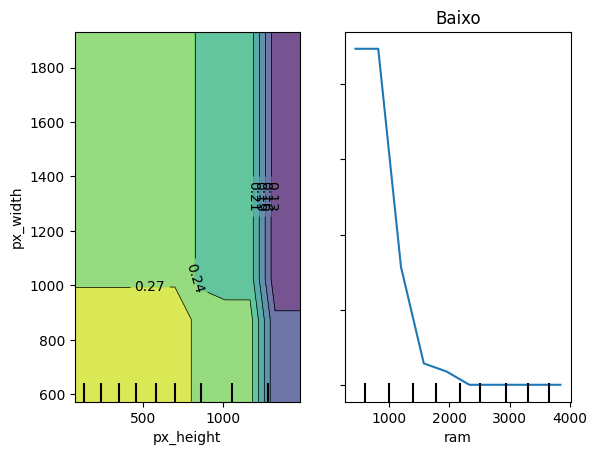


DecisionTreeClassifier 2:


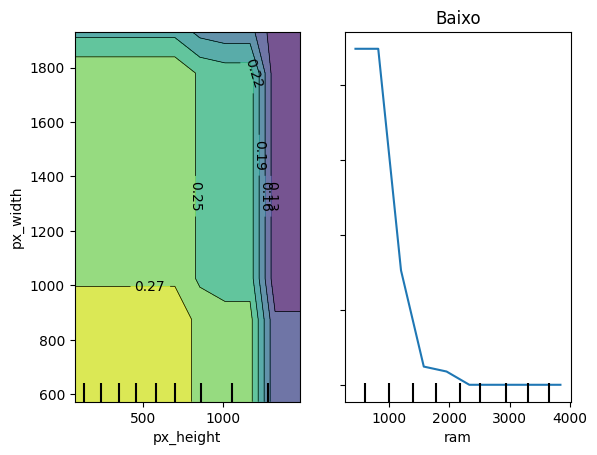


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


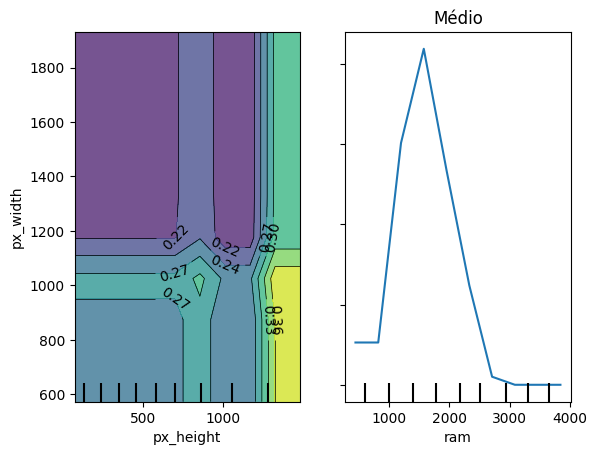


DecisionTreeClassifier 2:


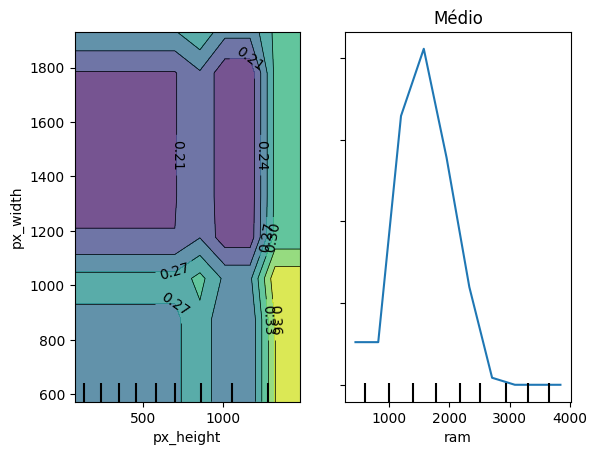


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


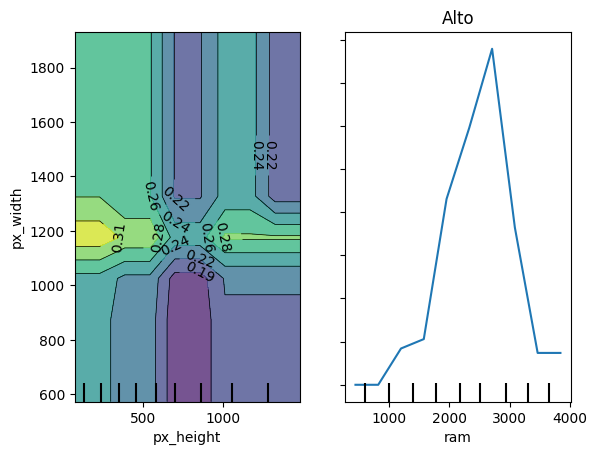


DecisionTreeClassifier 2:


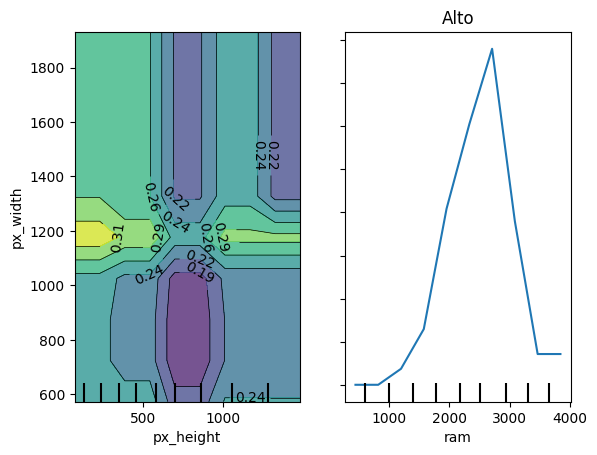


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


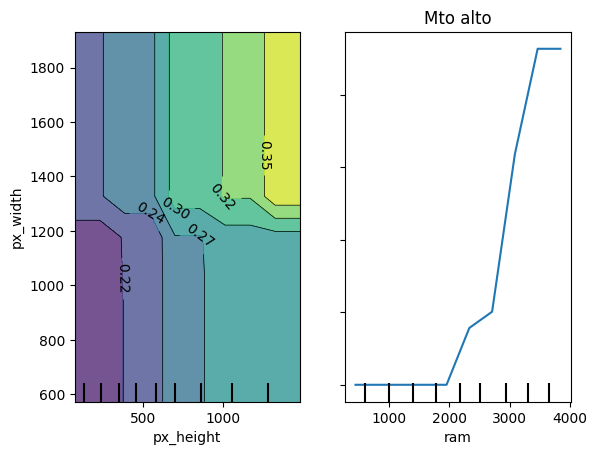


DecisionTreeClassifier 2:


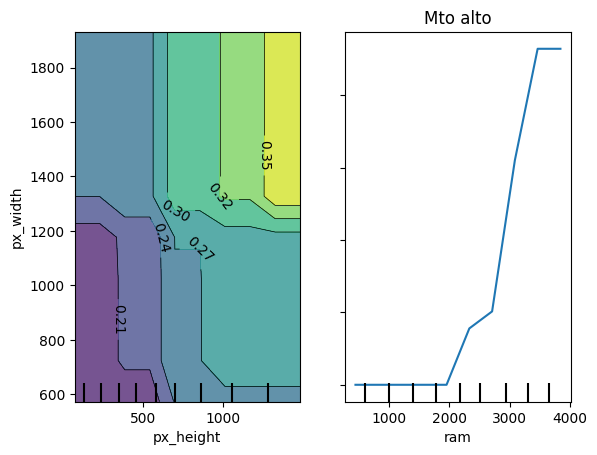


------------------------------------------------------------
------------------------------------------------------------


In [79]:
pdp2versions((dtree, bigdtree), (X_train, X_train), [(11, 12), 13], res=10)


DecisionTreeClassifier 1:


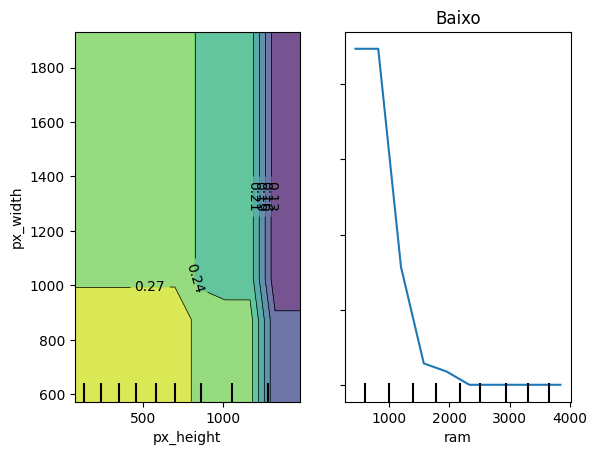


DecisionTreeClassifier 2:


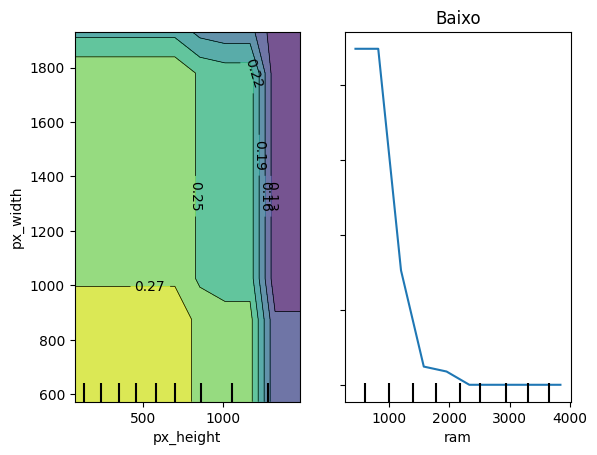


DecisionTreeClassifier 3:


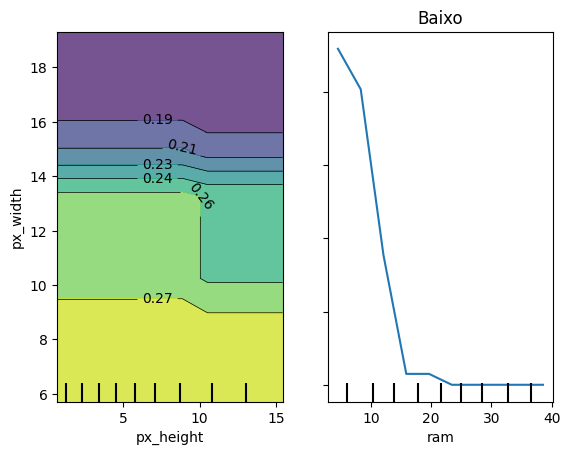


DecisionTreeClassifier 4:


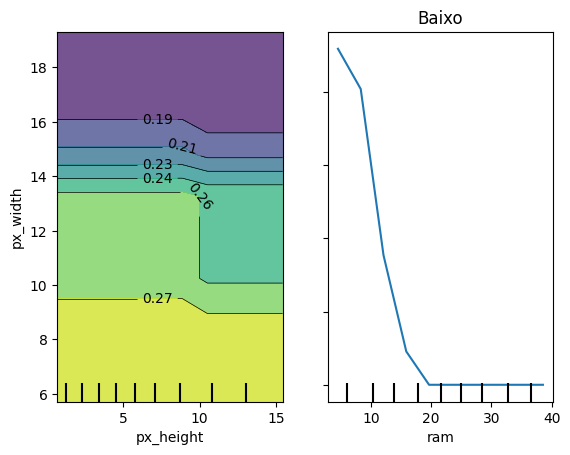


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


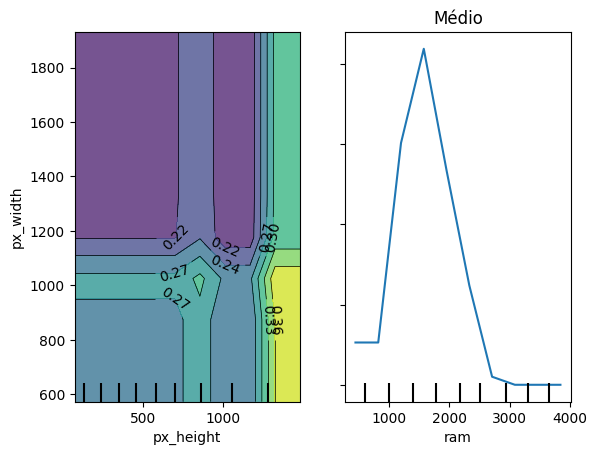


DecisionTreeClassifier 2:


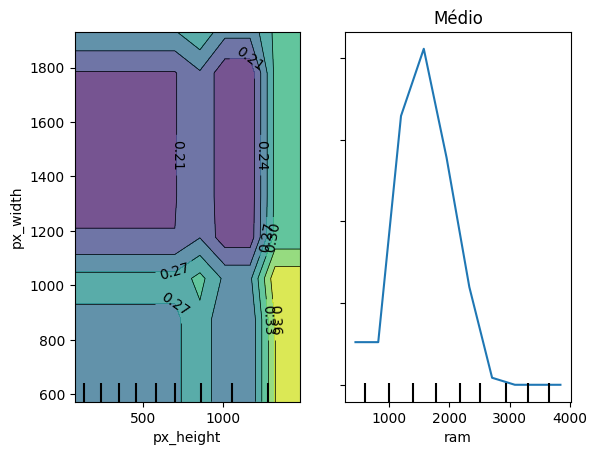


DecisionTreeClassifier 3:


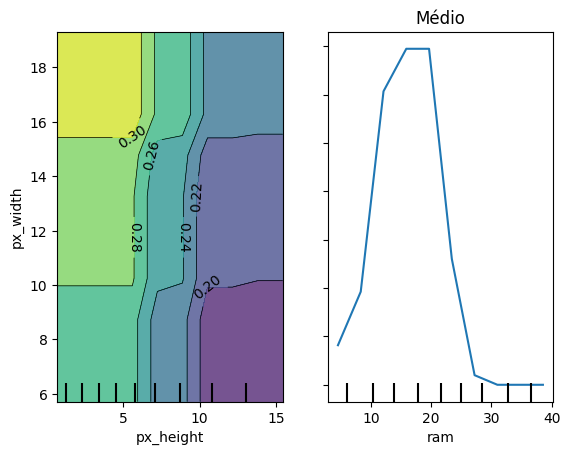


DecisionTreeClassifier 4:


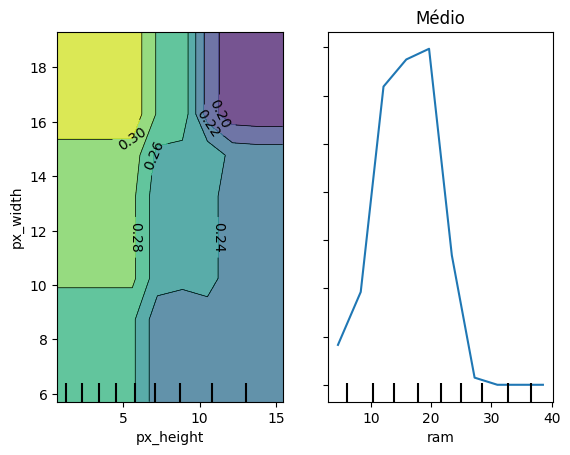


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


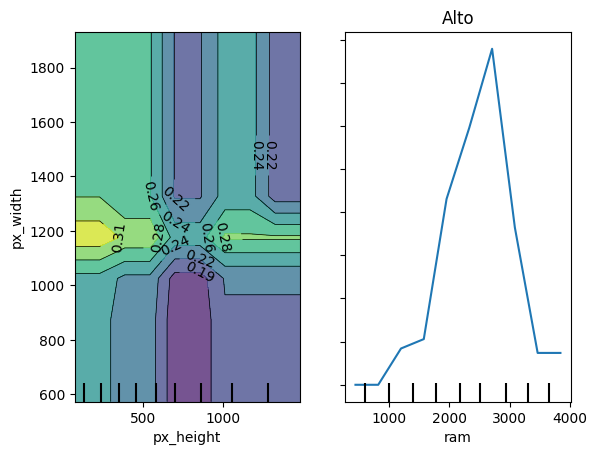


DecisionTreeClassifier 2:


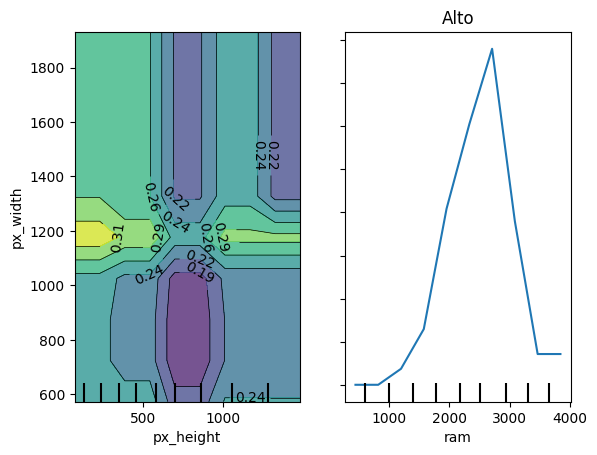


DecisionTreeClassifier 3:


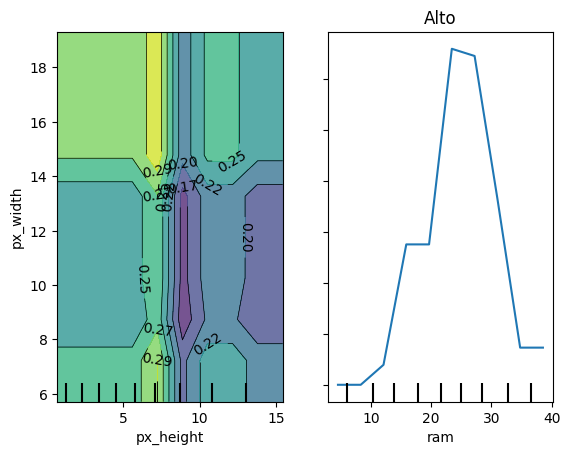


DecisionTreeClassifier 4:


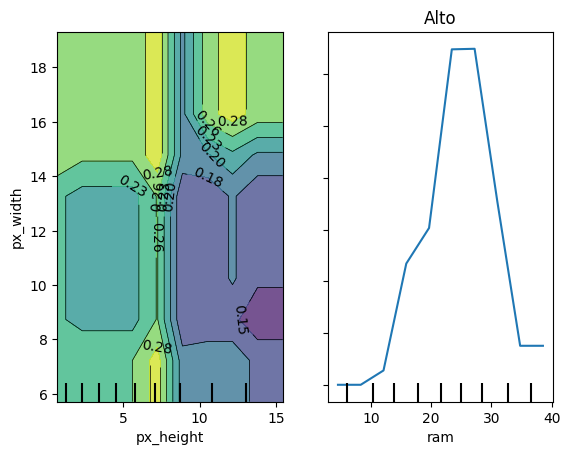


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


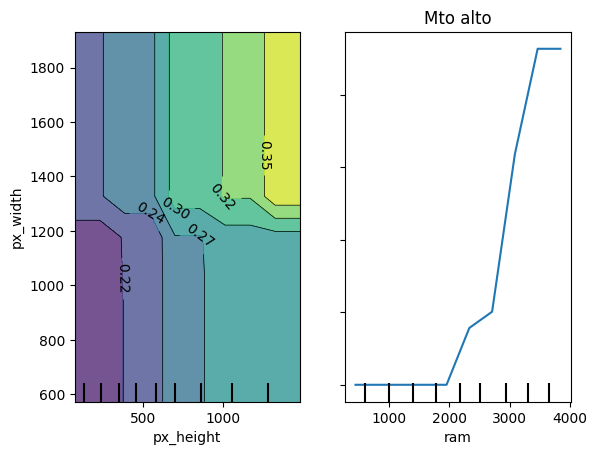


DecisionTreeClassifier 2:


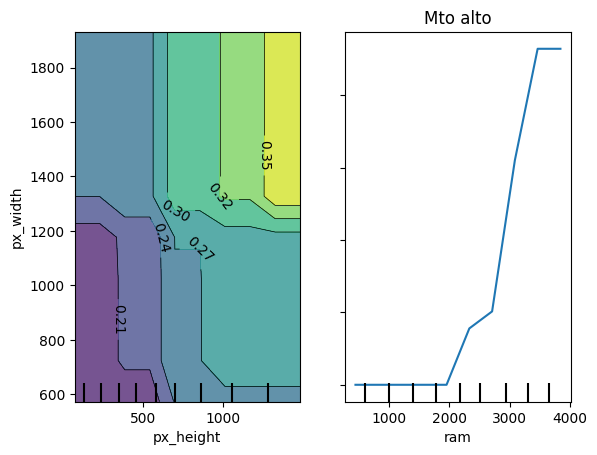


DecisionTreeClassifier 3:


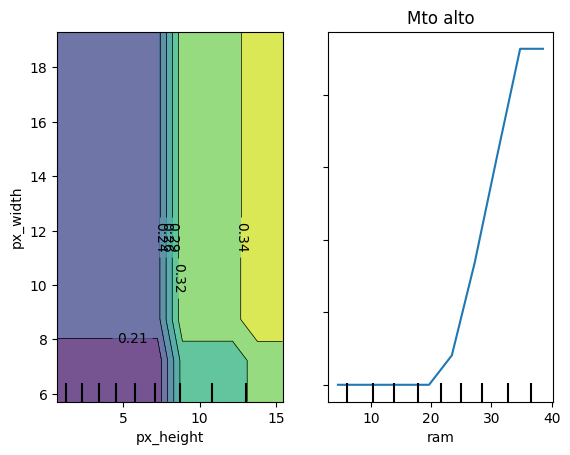


DecisionTreeClassifier 4:


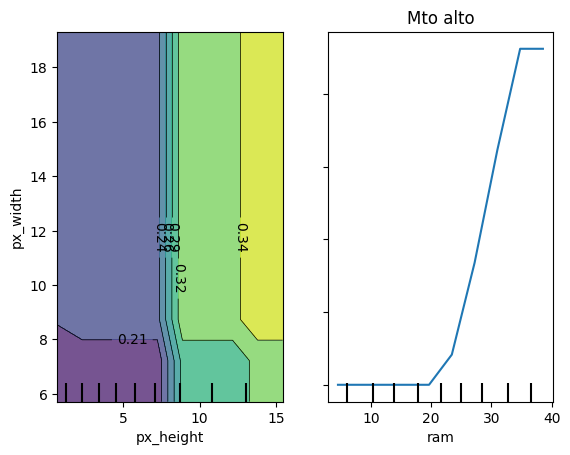


------------------------------------------------------------
------------------------------------------------------------


In [80]:
pdp2versions((dtree, bigdtree, dtree2, bigdtree2), (X_train, X_train, X_train2, X_train2), [(11, 12), 13], res=10)

---
### rforest

In [81]:
rforests = (rforest, rforest2, rforest3)

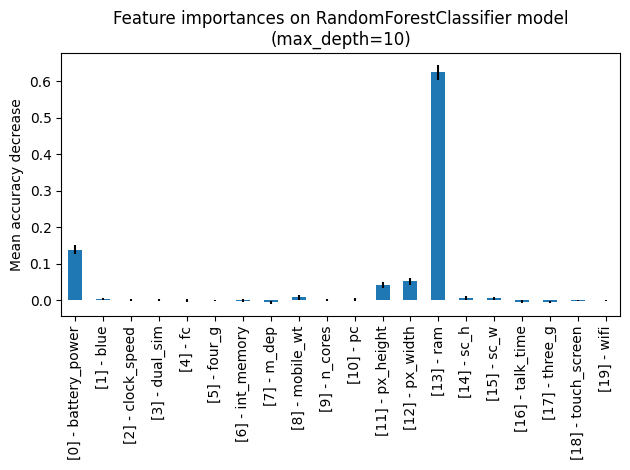

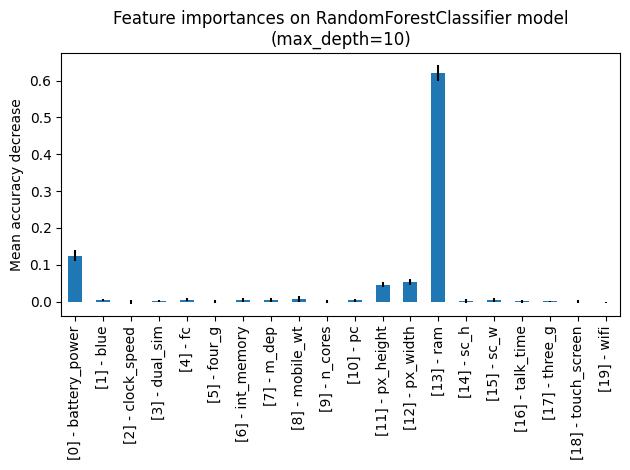

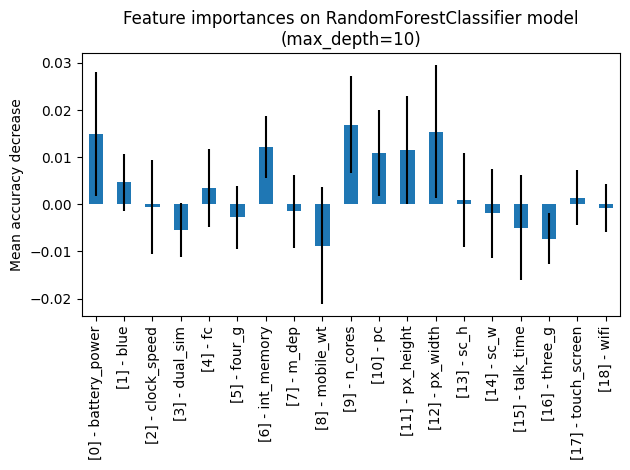

In [82]:
pfi(rforest, X_test, y_test)
pfi(rforest2, X_test2, y_test2)
pfi(rforest3, X_test3, y_test3)


RandomForestClassifier 1:


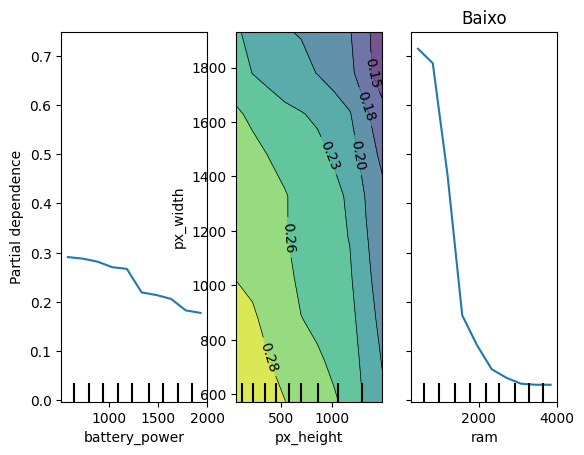


RandomForestClassifier 2:


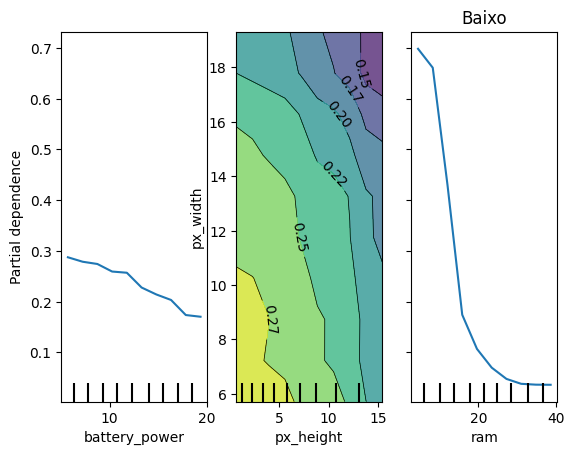


RandomForestClassifier 3:


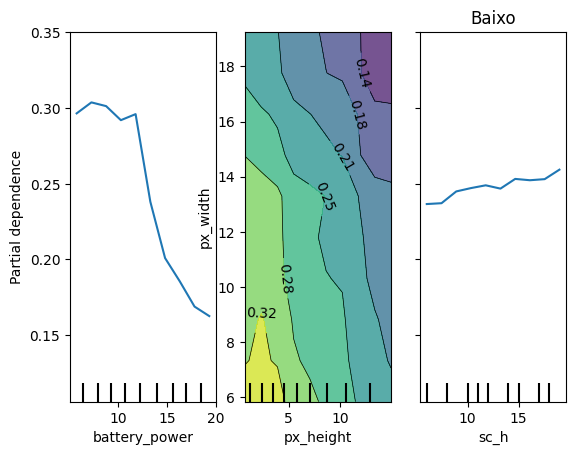


------------------------------------------------------------
------------------------------------------------------------

RandomForestClassifier 1:


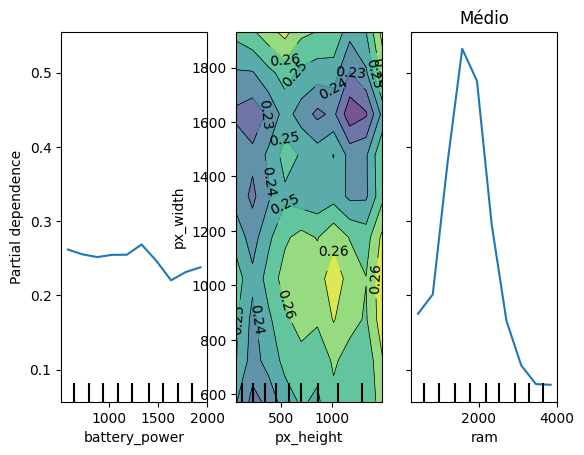


RandomForestClassifier 2:


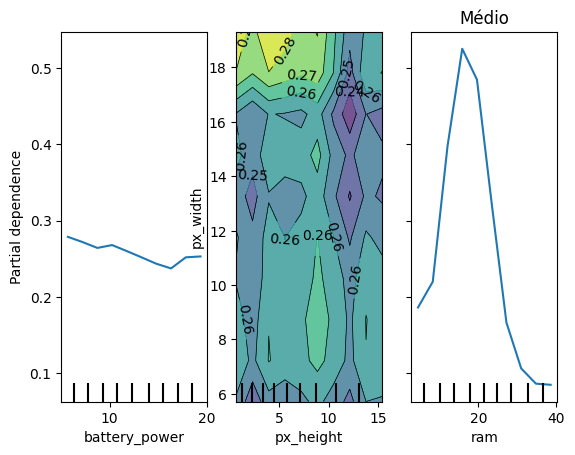


RandomForestClassifier 3:


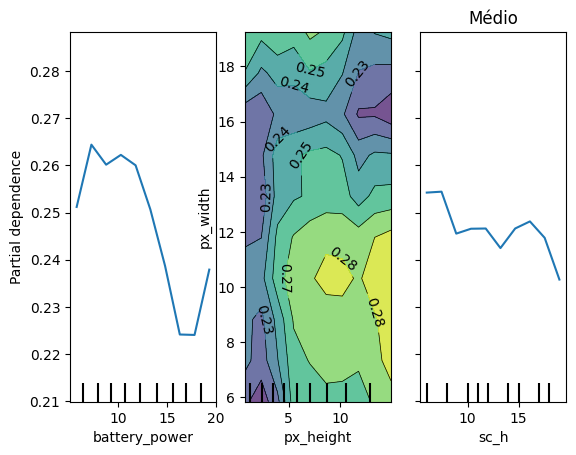


------------------------------------------------------------
------------------------------------------------------------

RandomForestClassifier 1:


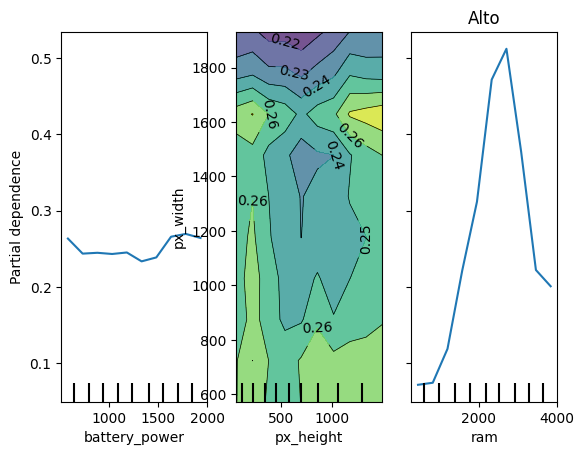


RandomForestClassifier 2:


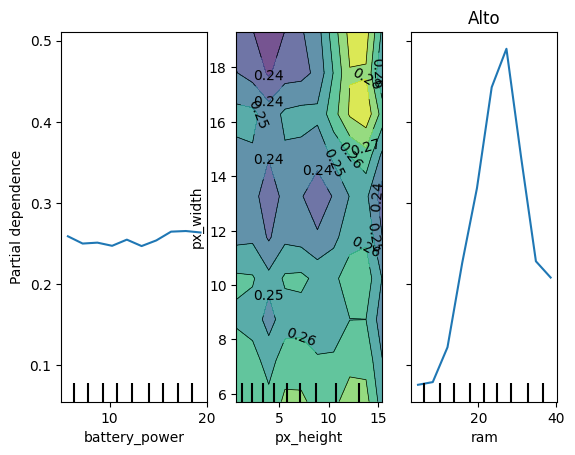


RandomForestClassifier 3:


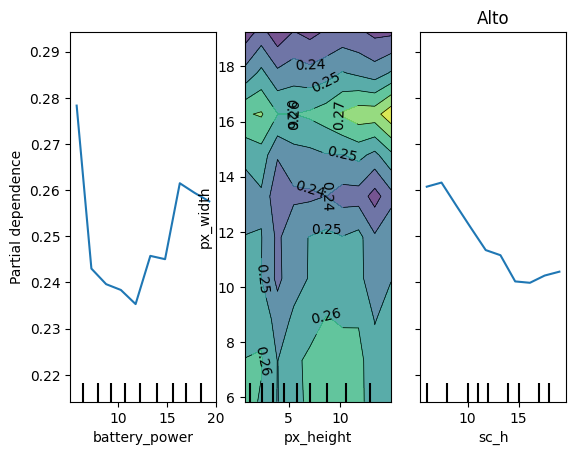


------------------------------------------------------------
------------------------------------------------------------

RandomForestClassifier 1:


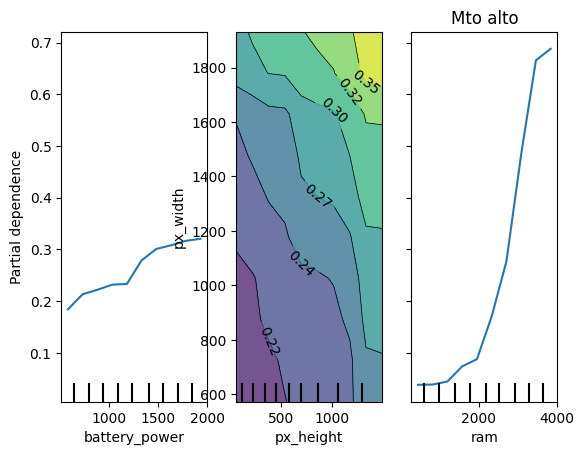


RandomForestClassifier 2:


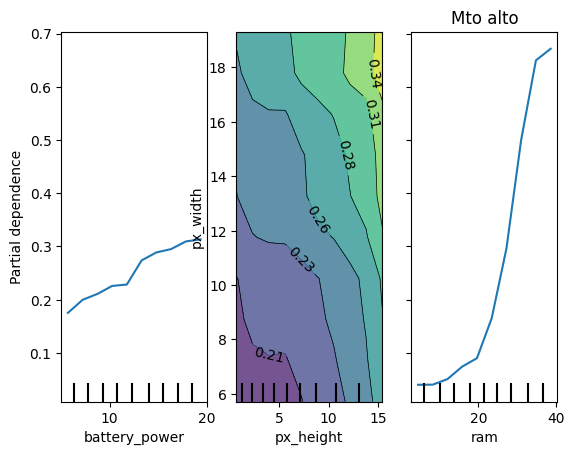


RandomForestClassifier 3:


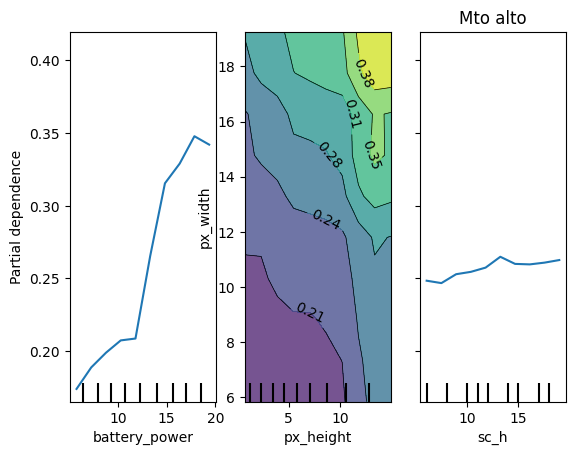


------------------------------------------------------------
------------------------------------------------------------


In [83]:
pdp2versions(rforests, xtrains, [0, (11, 12), 13])

---
### knn

In [84]:
knns = (knn, knn2, knn3)

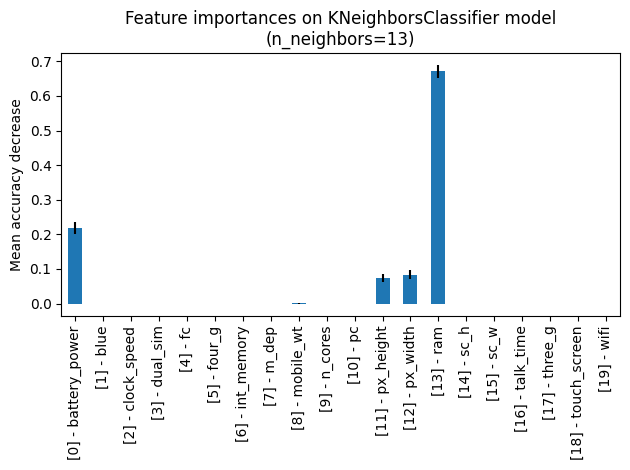

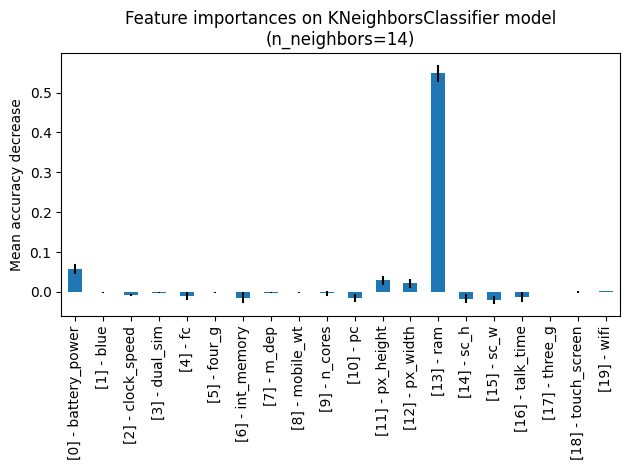

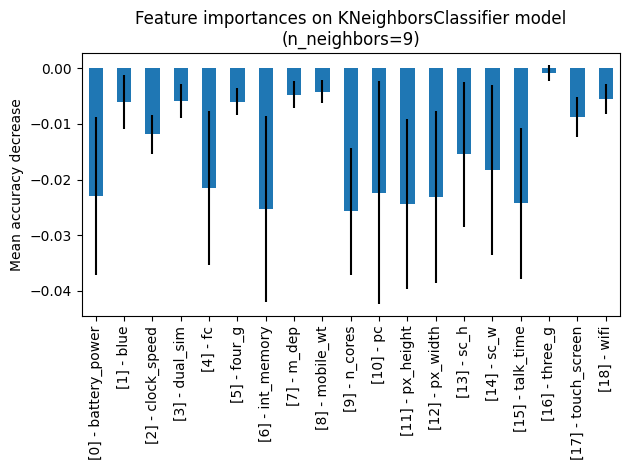

In [85]:
pfi(knn, X_test, y_test)
pfi(knn2, X_test2, y_test2)
pfi(knn3, X_test3, y_test3)


KNeighborsClassifier 1:


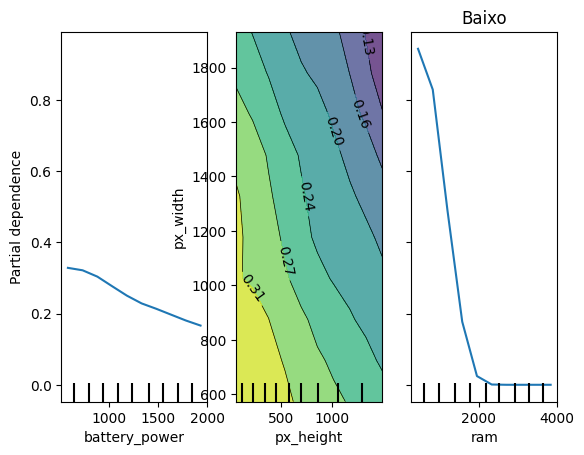


KNeighborsClassifier 2:


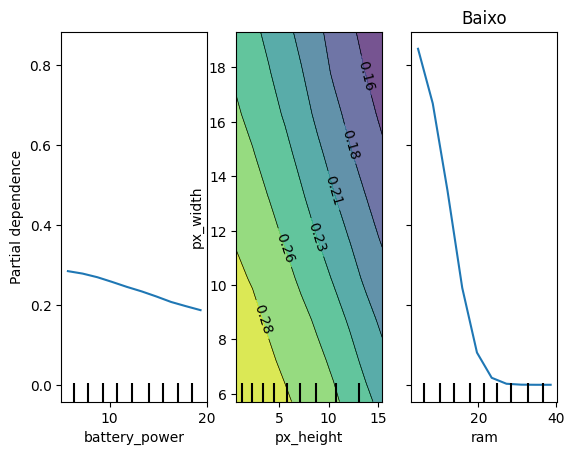


KNeighborsClassifier 3:


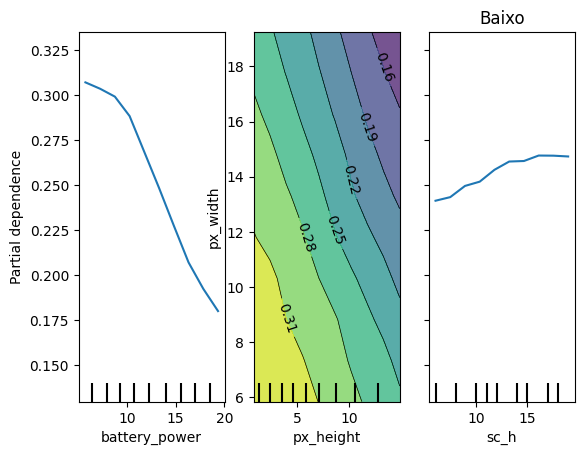


------------------------------------------------------------
------------------------------------------------------------

KNeighborsClassifier 1:


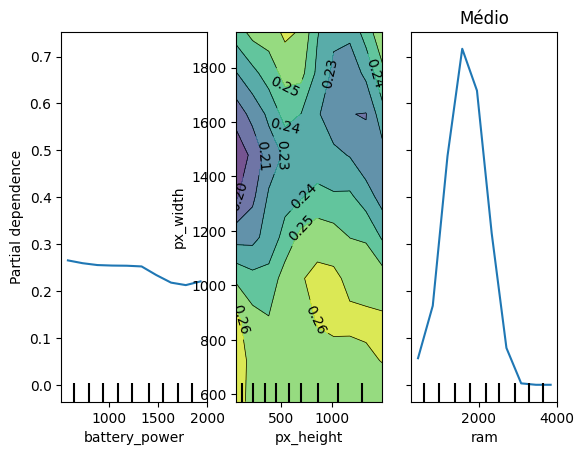


KNeighborsClassifier 2:


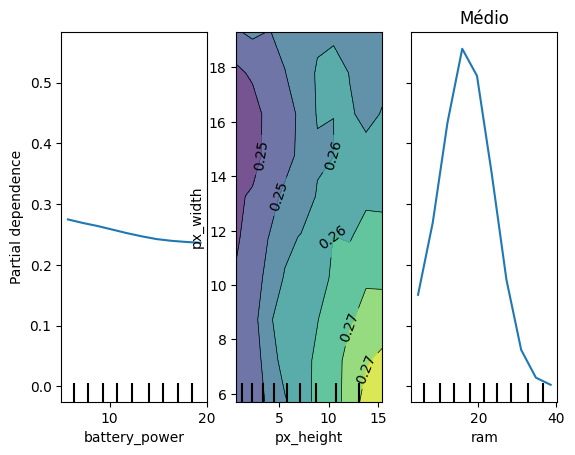


KNeighborsClassifier 3:


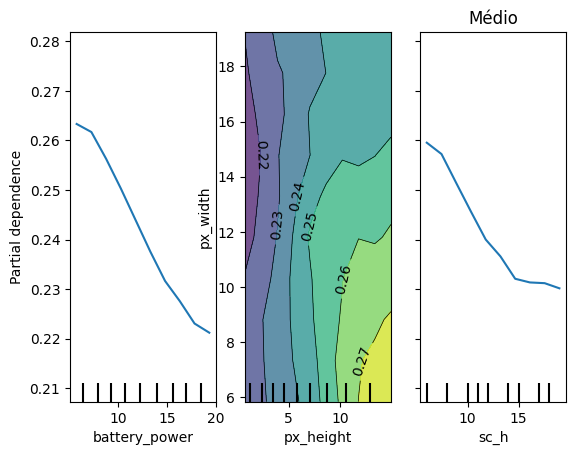


------------------------------------------------------------
------------------------------------------------------------

KNeighborsClassifier 1:


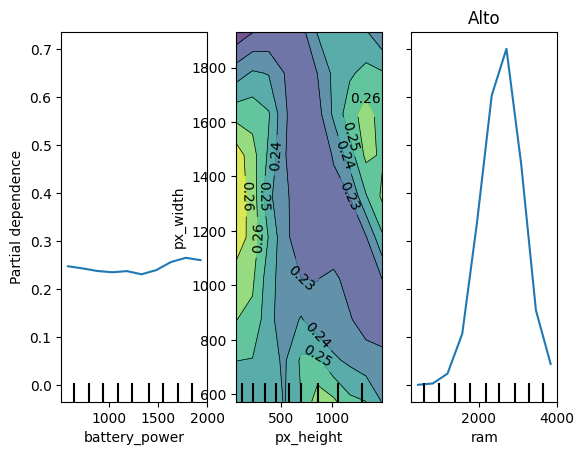


KNeighborsClassifier 2:


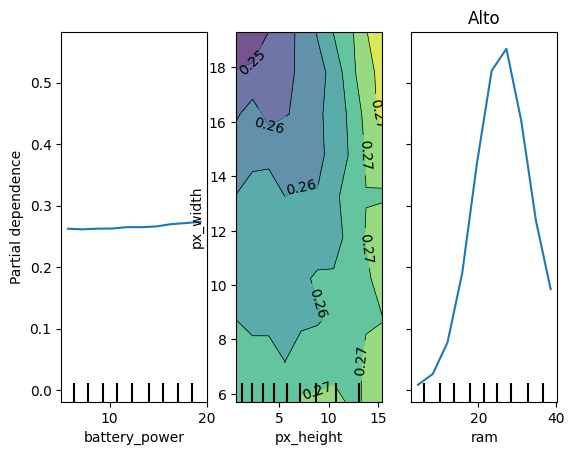


KNeighborsClassifier 3:


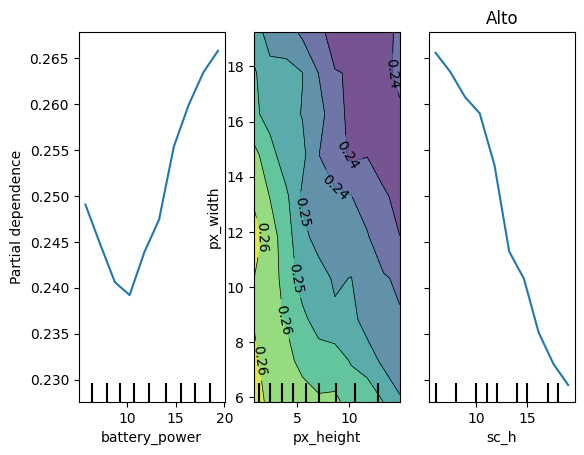


------------------------------------------------------------
------------------------------------------------------------

KNeighborsClassifier 1:


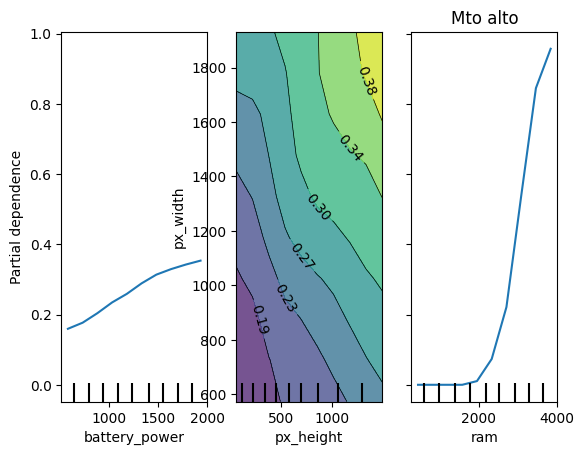


KNeighborsClassifier 2:


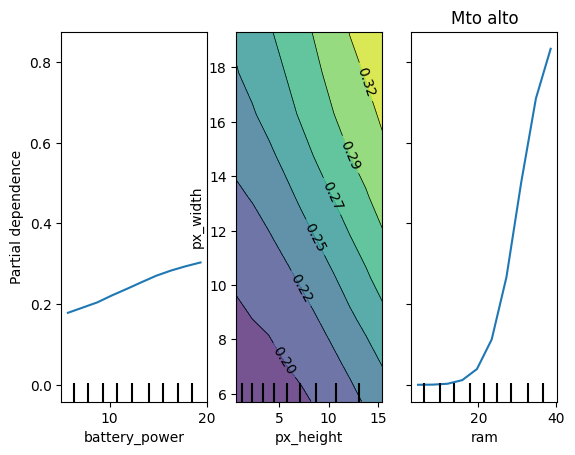


KNeighborsClassifier 3:


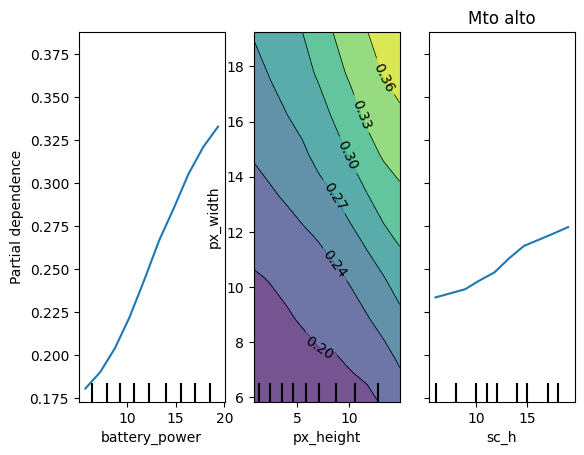


------------------------------------------------------------
------------------------------------------------------------


In [86]:
pdp2versions(knns, xtrains, [0, (11, 12), 13])

---
###mlp

In [88]:
mlps = (mlp, mlp2, mlp3)

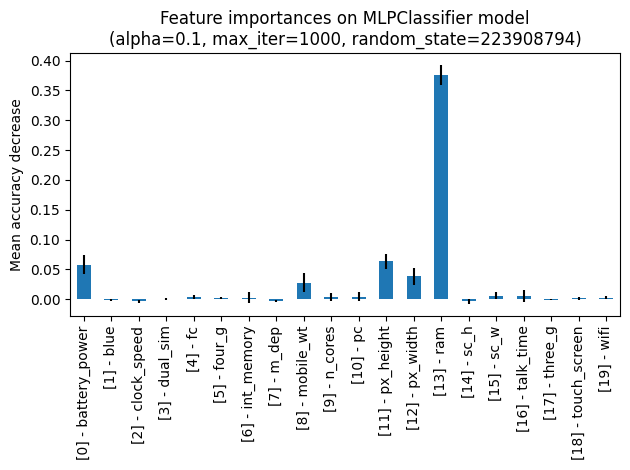

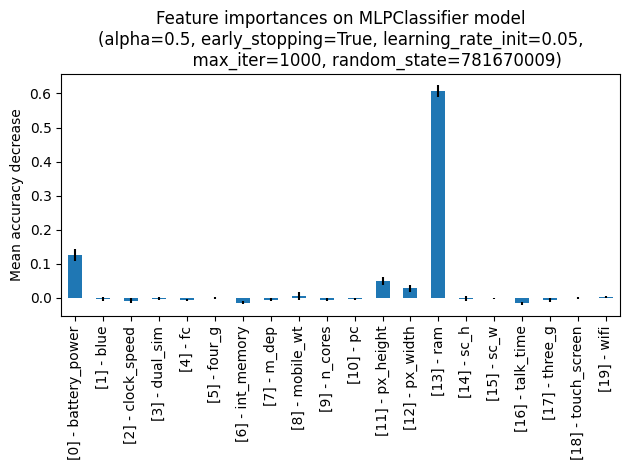

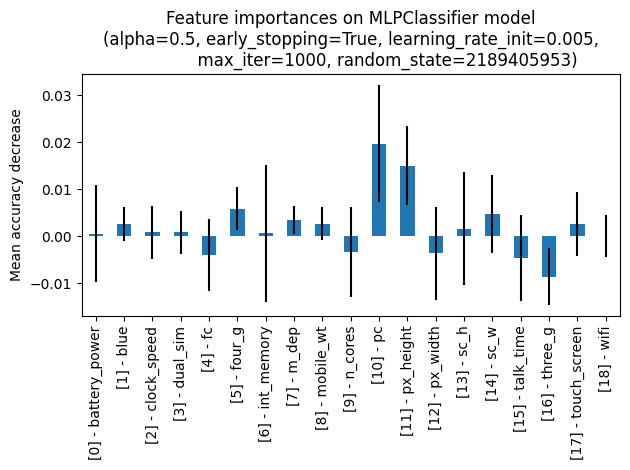

In [97]:
pfi(mlp, X_test, y_test)
pfi(mlp2, X_test2, y_test2)
pfi(mlp3, X_test3, y_test3)


MLPClassifier 1:


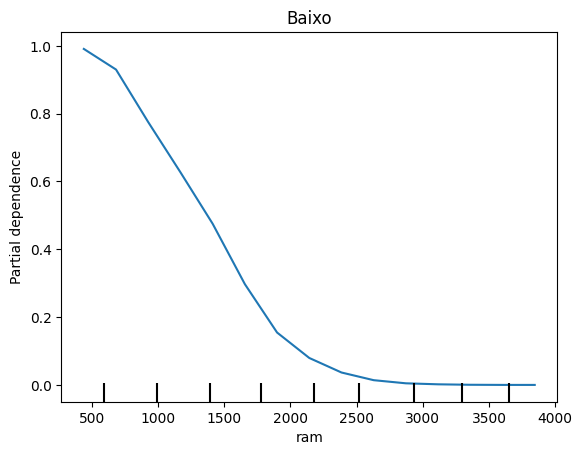


MLPClassifier 2:


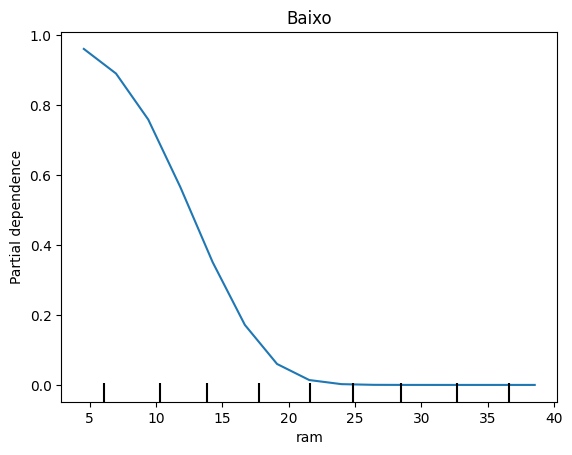


MLPClassifier 3:


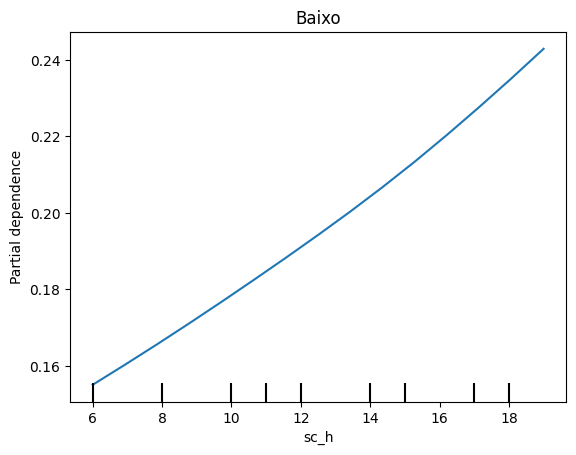


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 1:


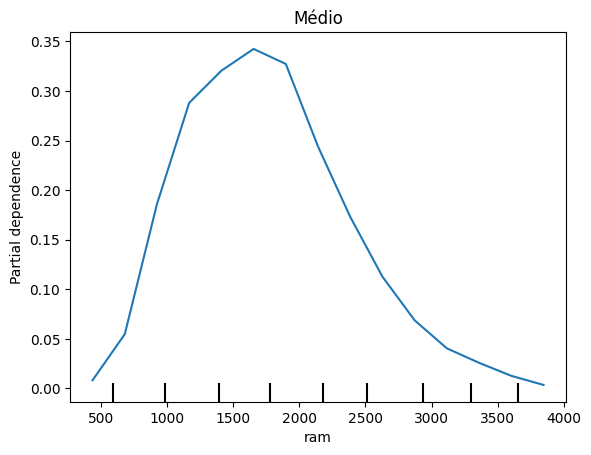


MLPClassifier 2:


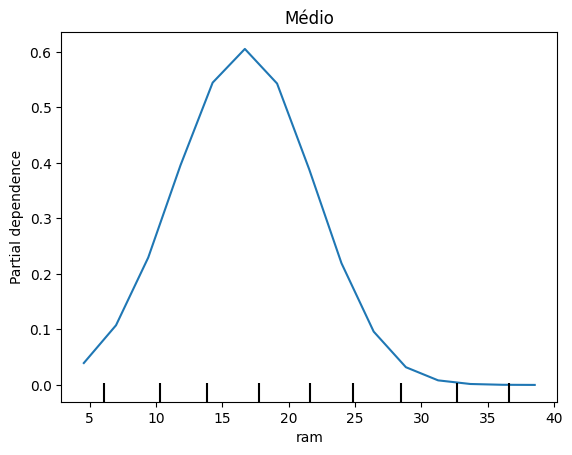


MLPClassifier 3:


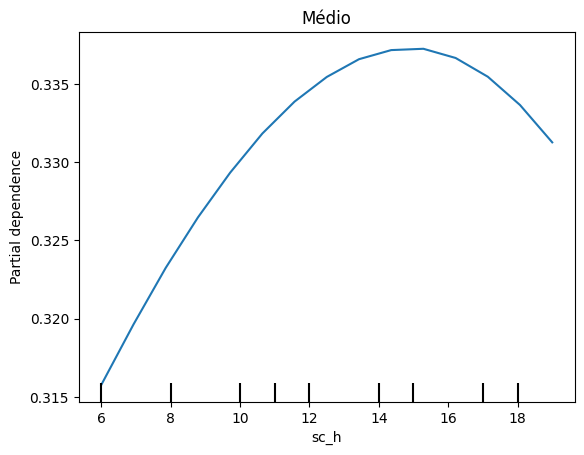


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 1:


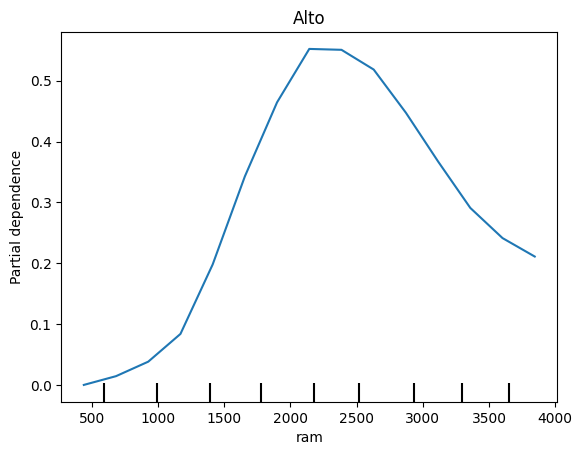


MLPClassifier 2:


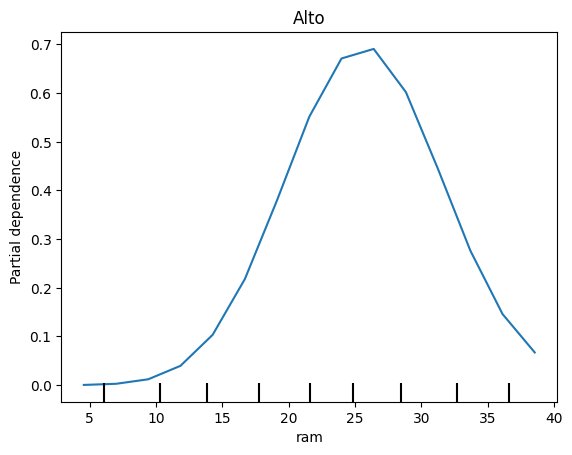


MLPClassifier 3:


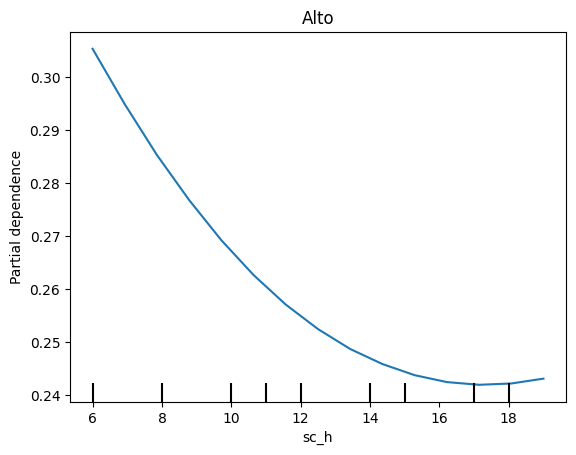


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 1:


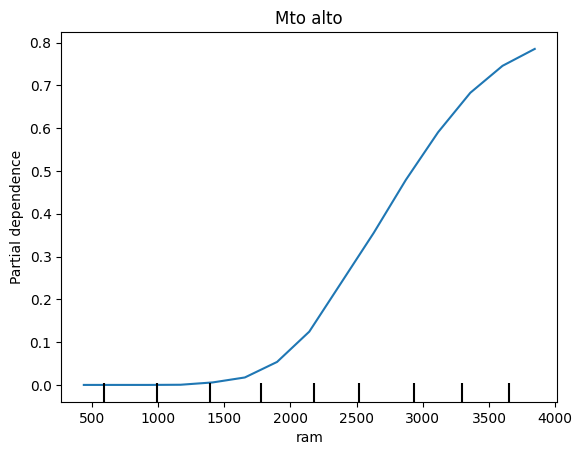


MLPClassifier 2:


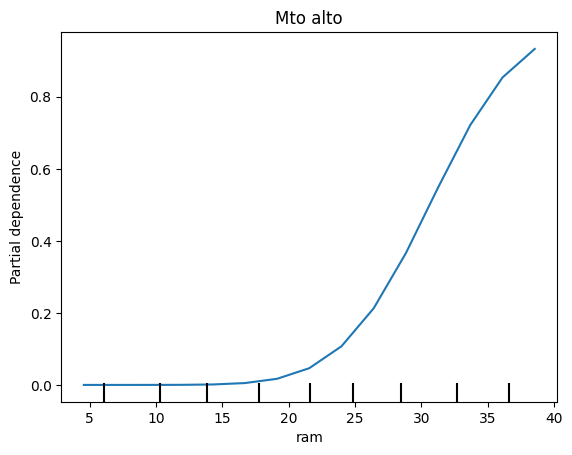


MLPClassifier 3:


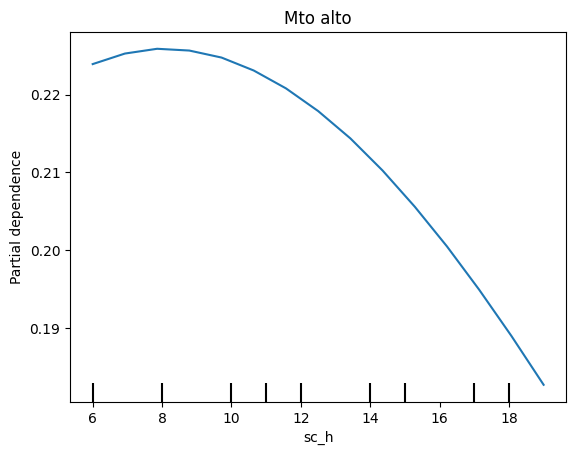


------------------------------------------------------------
------------------------------------------------------------


In [89]:
#pdp.from_estimator(mlp, X_train, [4, 5, 7])
pdp2versions(mlps, xtrains, [13], res=15, axis=0)


MLPClassifier 1:


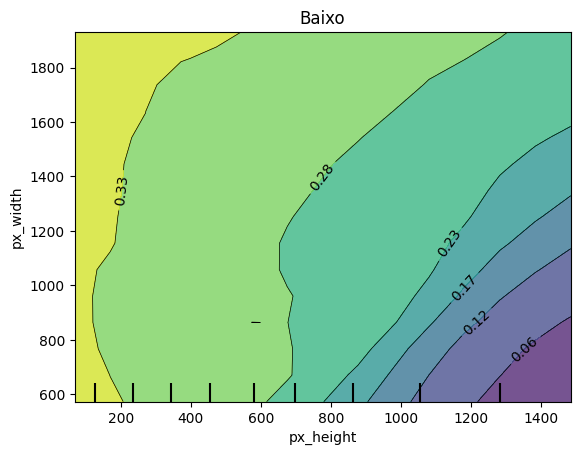

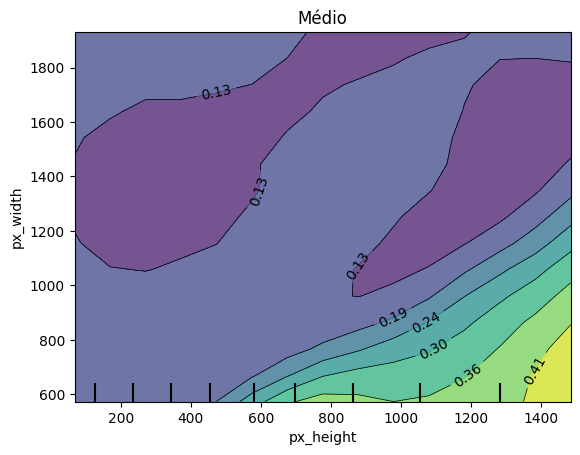

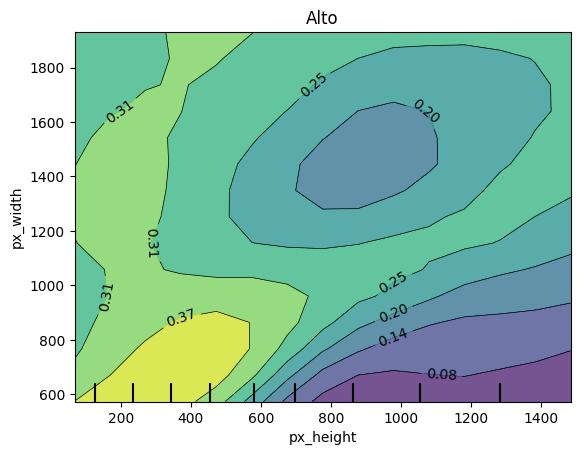

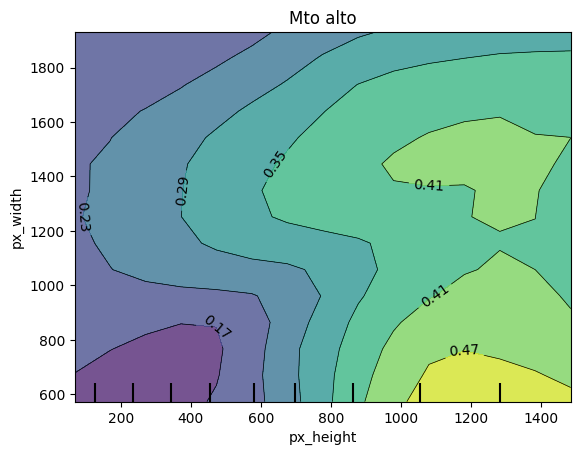


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 2:


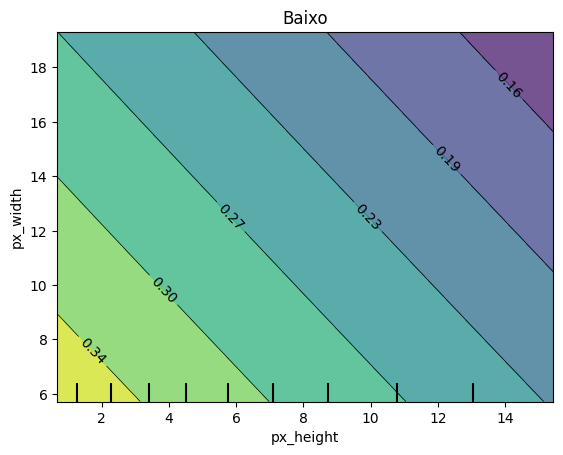

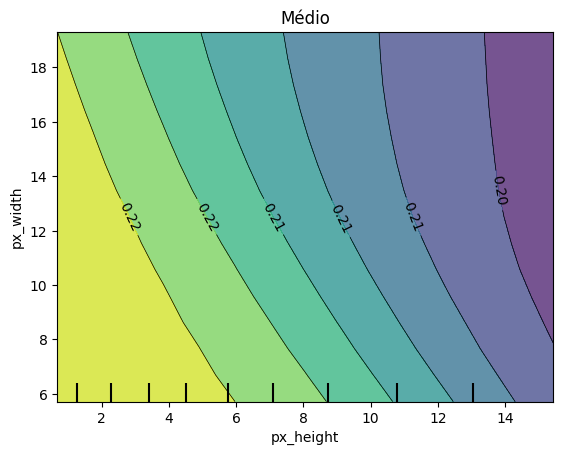

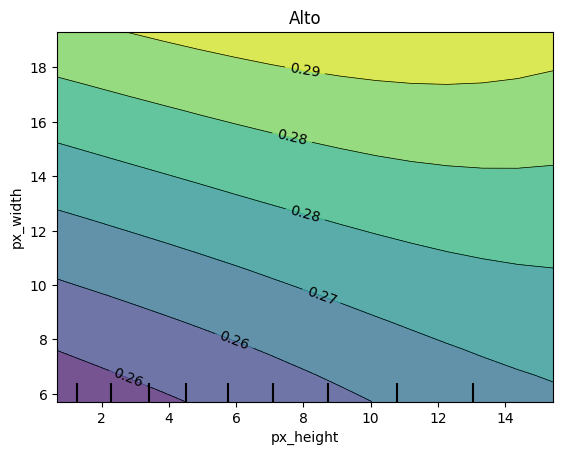

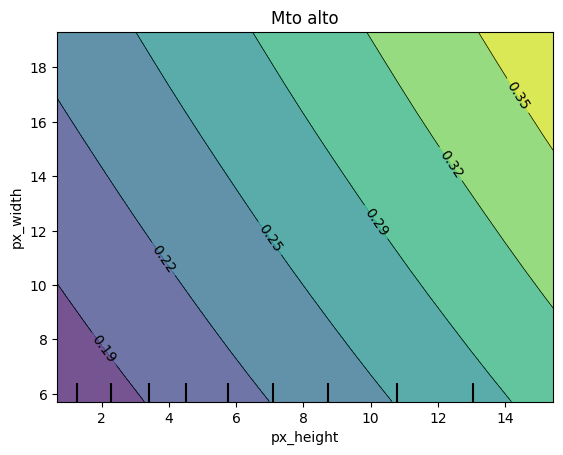


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 3:


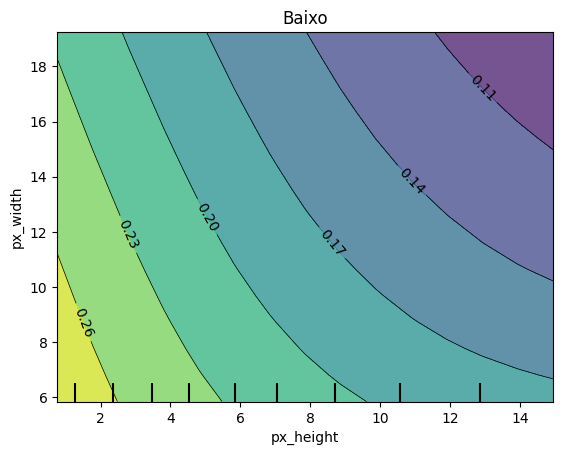

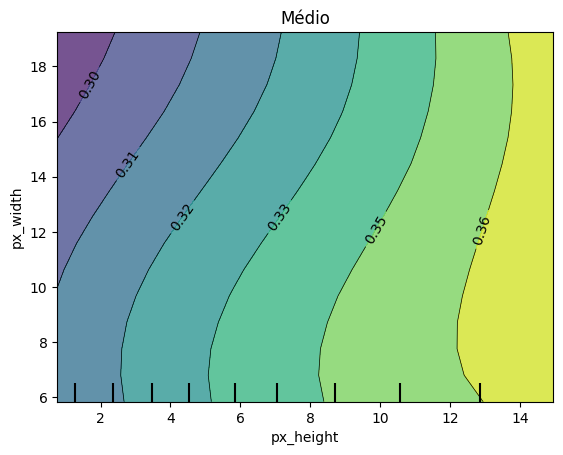

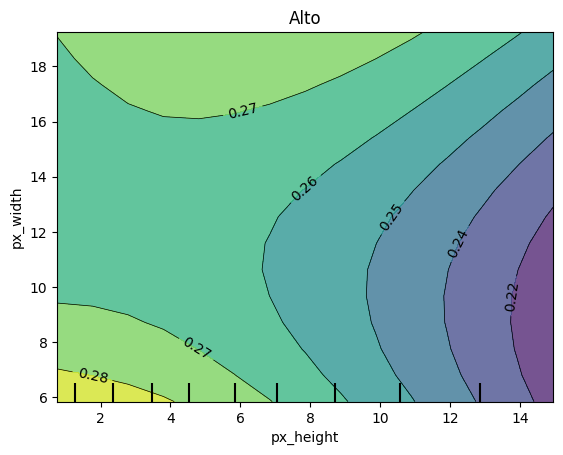

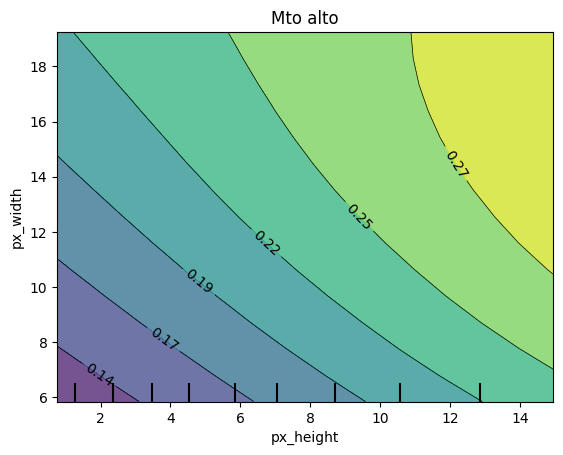


------------------------------------------------------------
------------------------------------------------------------


In [90]:
pdp2versions(mlps, xtrains, [(11, 12)], res=15, axis=1)


MLPClassifier 1:


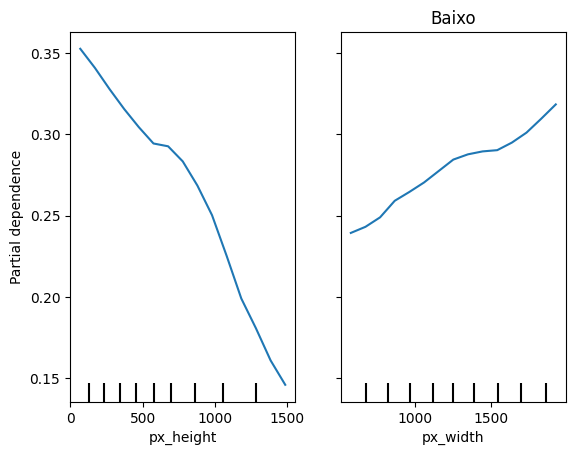


MLPClassifier 2:


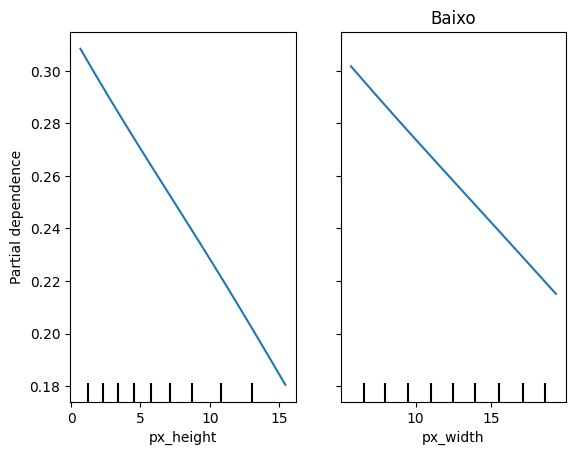


MLPClassifier 3:


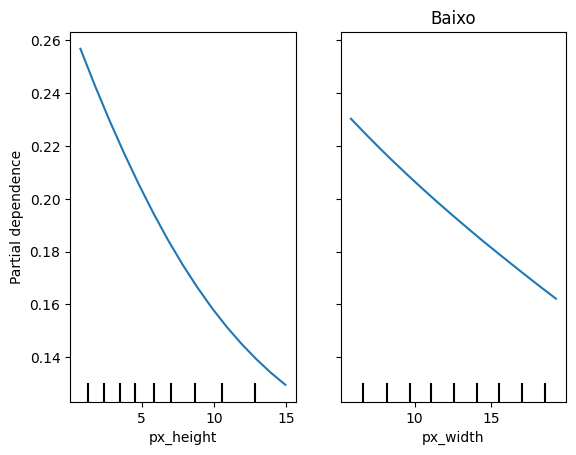


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 1:


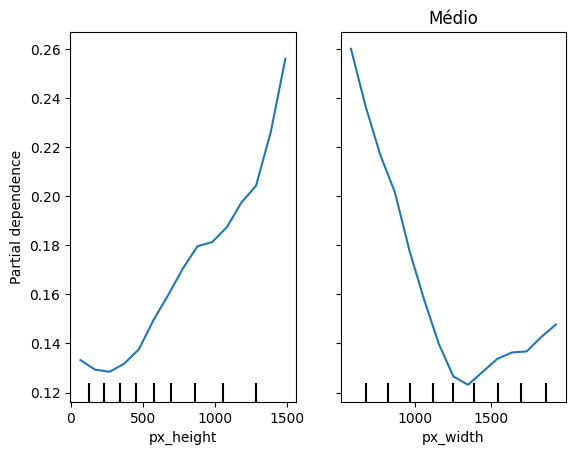


MLPClassifier 2:


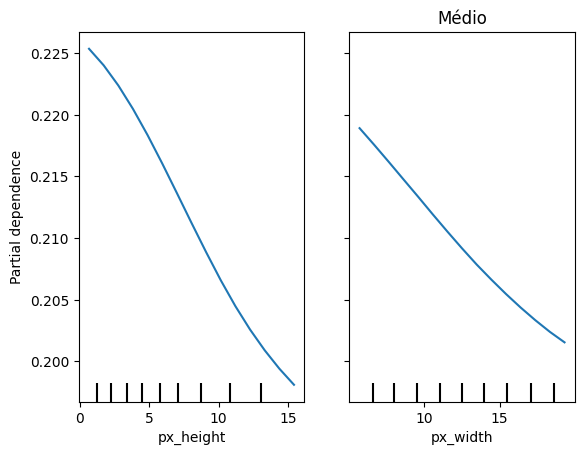


MLPClassifier 3:


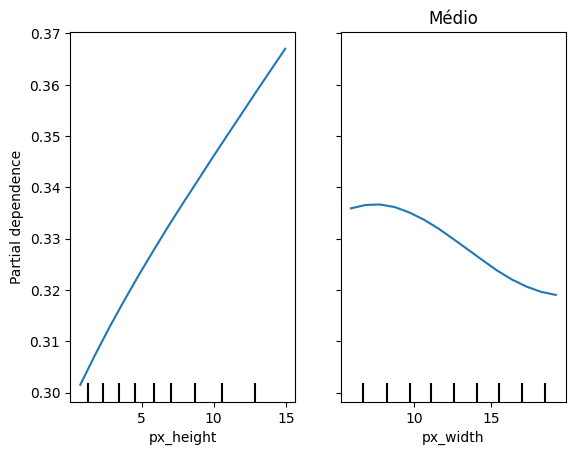


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 1:


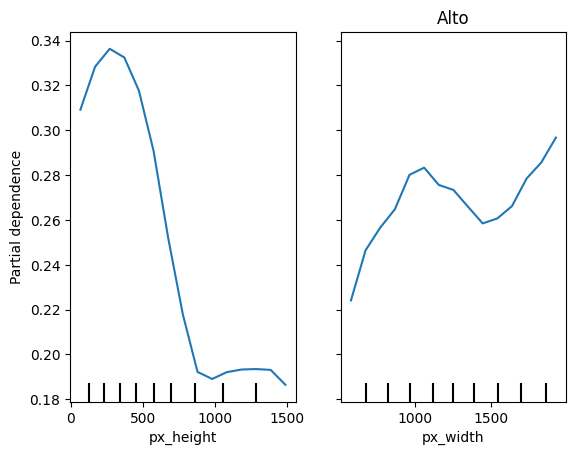


MLPClassifier 2:


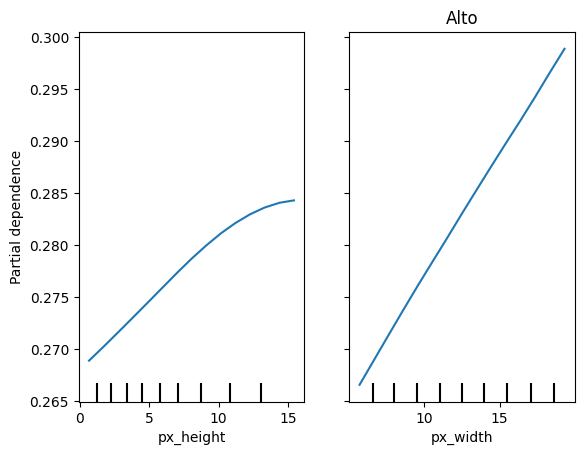


MLPClassifier 3:


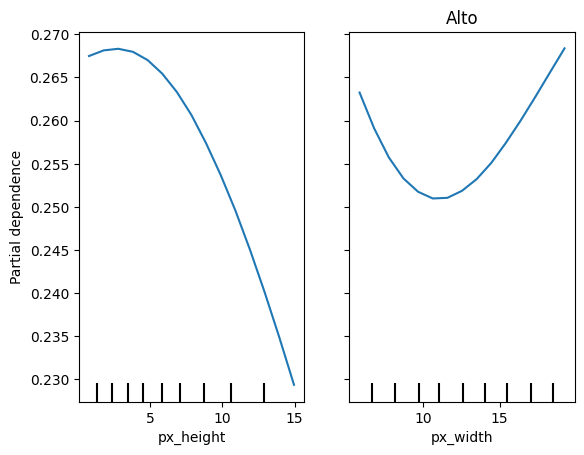


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 1:


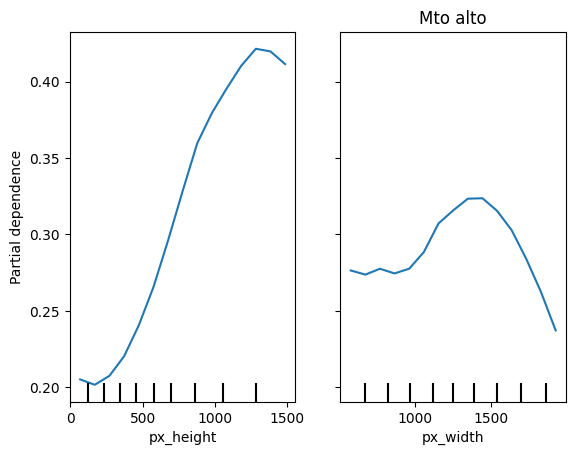


MLPClassifier 2:


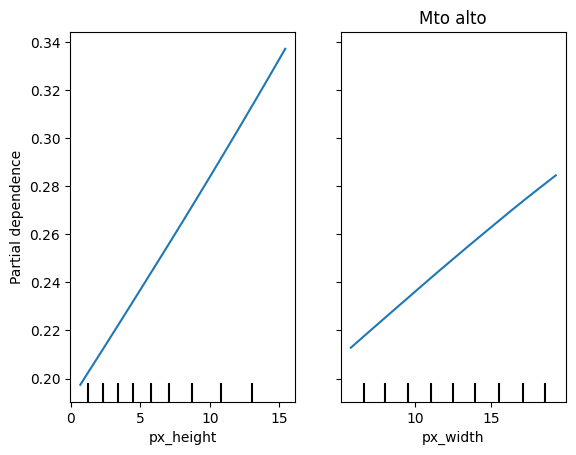


MLPClassifier 3:


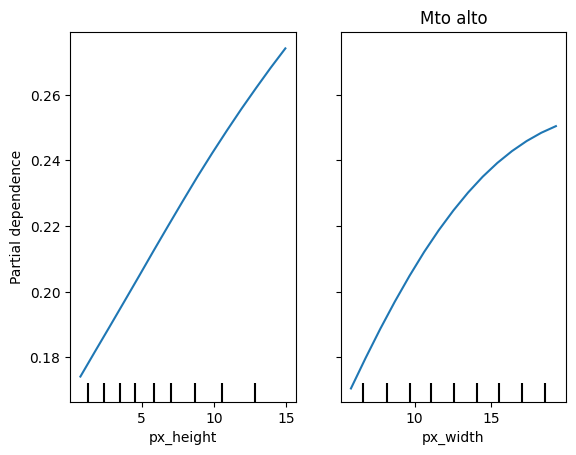


------------------------------------------------------------
------------------------------------------------------------


In [91]:
pdp2versions(mlps, xtrains, [11, 12], res=15)

---


DecisionTreeClassifier 1:


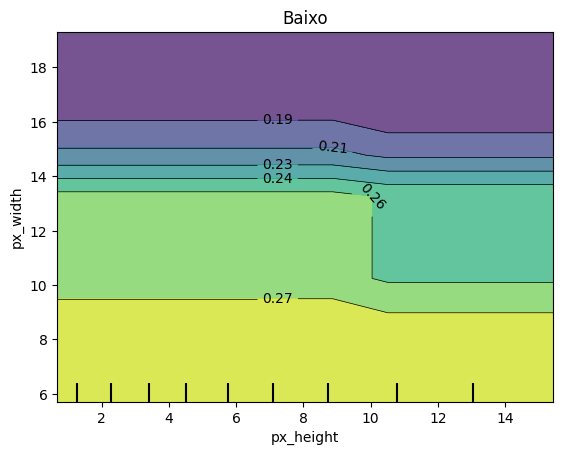


RandomForestClassifier 2:


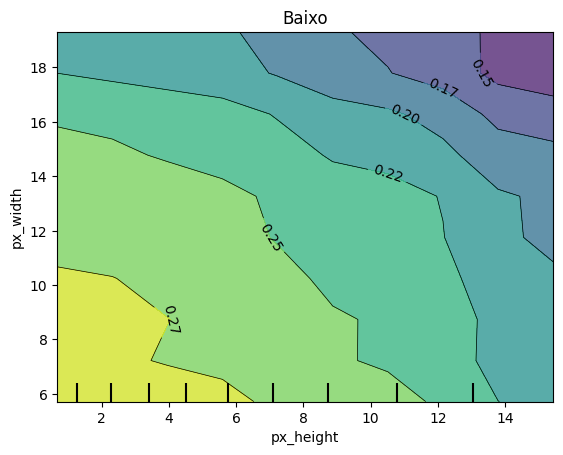


KNeighborsClassifier 3:


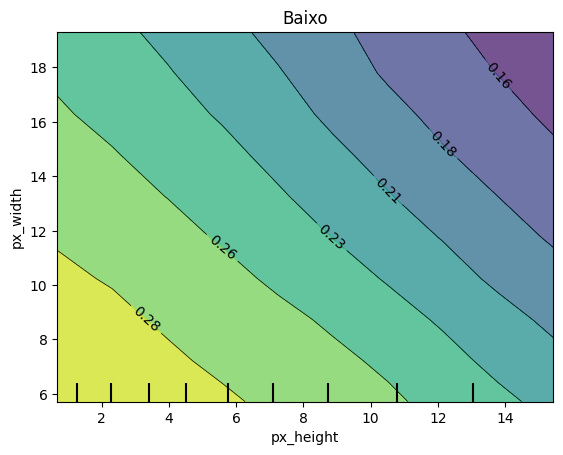


MLPClassifier 4:


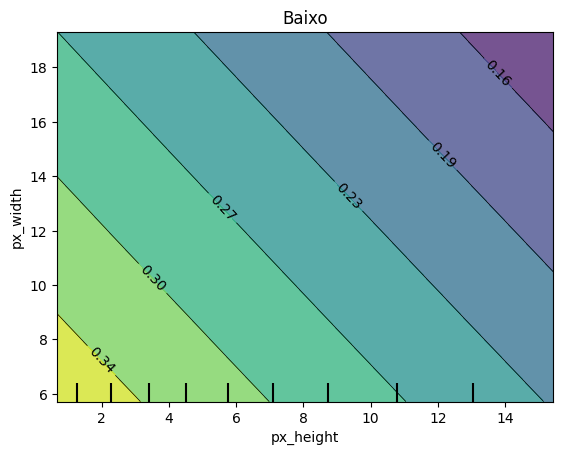


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


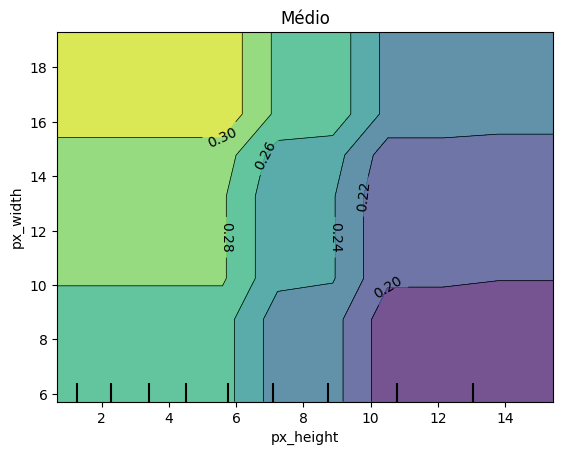


RandomForestClassifier 2:


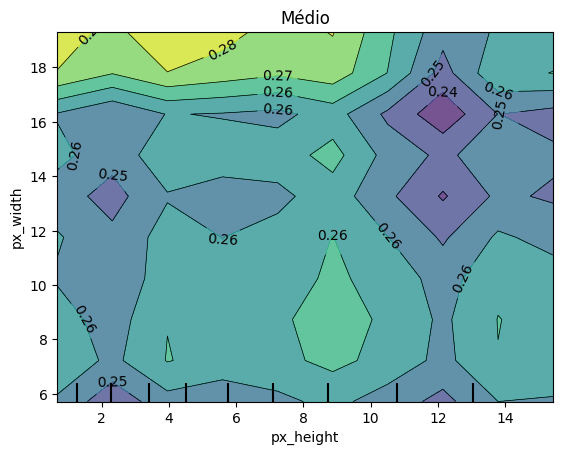


KNeighborsClassifier 3:


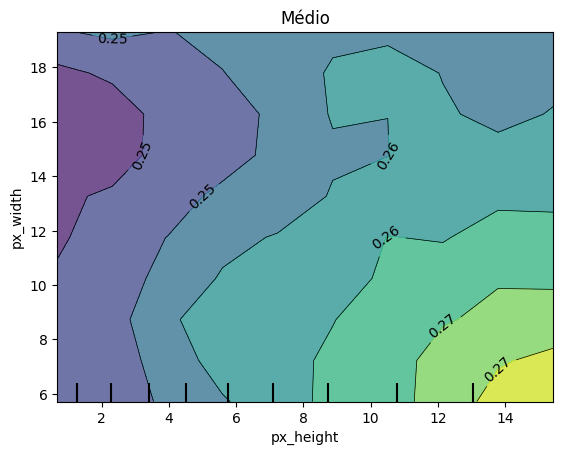


MLPClassifier 4:


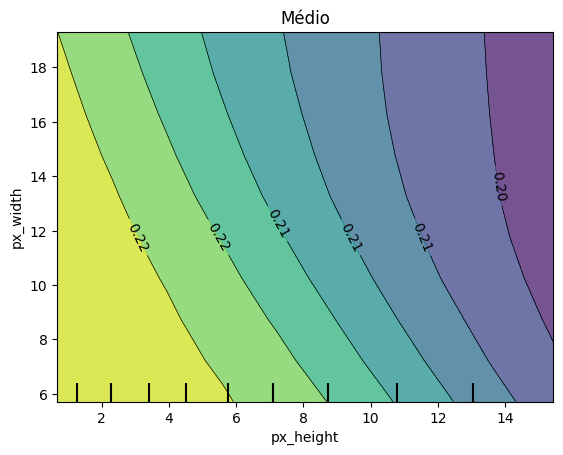


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


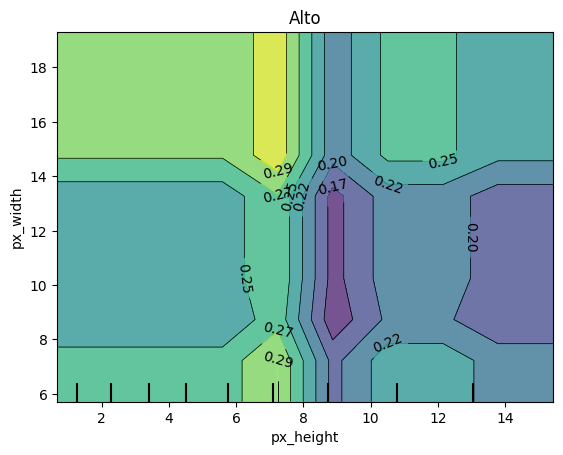


RandomForestClassifier 2:


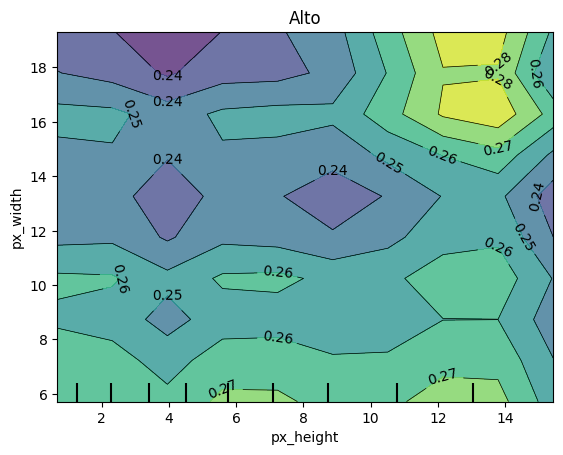


KNeighborsClassifier 3:


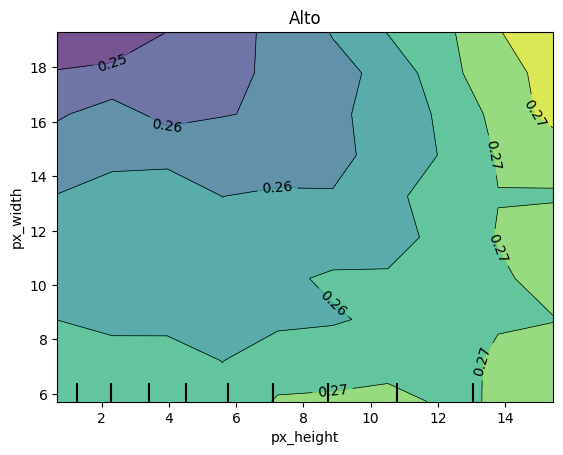


MLPClassifier 4:


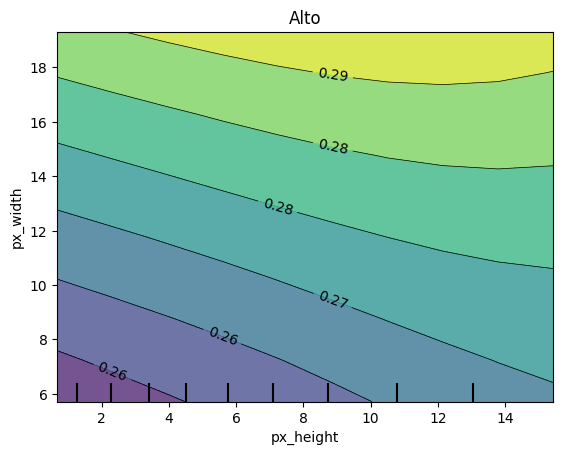


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


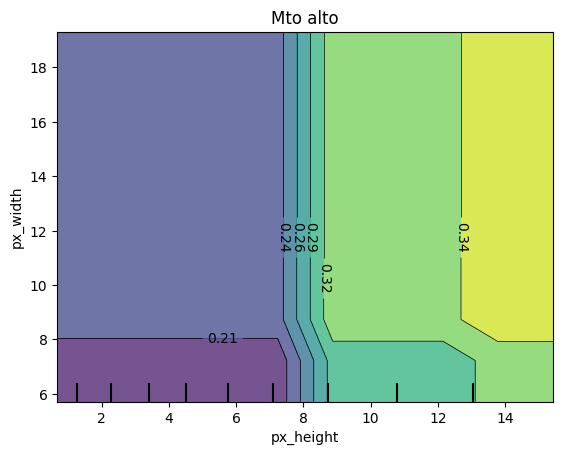


RandomForestClassifier 2:


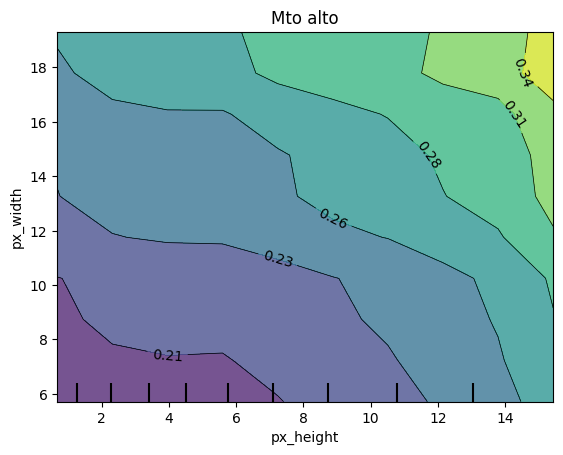


KNeighborsClassifier 3:


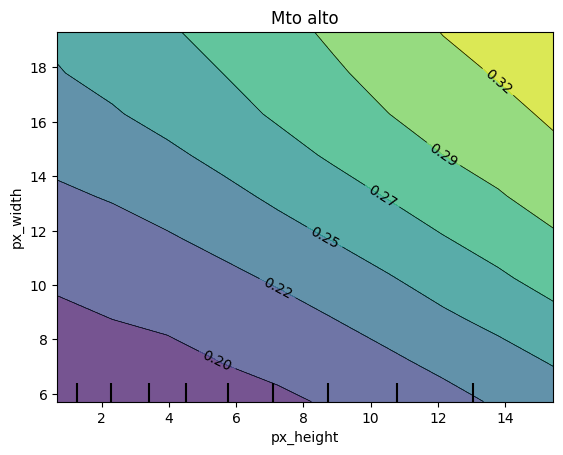


MLPClassifier 4:


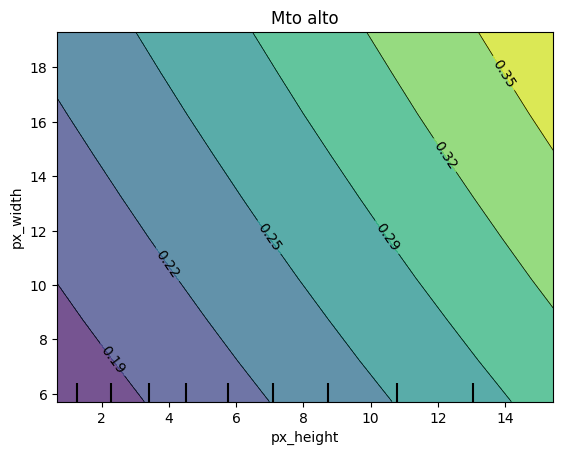


------------------------------------------------------------
------------------------------------------------------------


In [92]:
pdp2versions((dtree2, rforest2, knn2, mlp2), [X_train2]*4, [(11, 12)])

# **Análise e Conclusão**

In [93]:
df.corr('spearman')

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011273     0.009161 -0.042033  0.034931   
blue                0.011273  1.000000     0.017336  0.035198  0.001095   
clock_speed         0.009161  0.017336     1.000000 -0.002278 -0.005288   
dual_sim           -0.042033  0.035198    -0.002278  1.000000 -0.038122   
fc                  0.034931  0.001095    -0.005288 -0.038122  1.000000   
four_g              0.015399  0.013443    -0.042833  0.003187 -0.023770   
int_memory         -0.003748  0.040559     0.005447 -0.015557 -0.027282   
m_dep               0.033412  0.002793    -0.014712 -0.021461  0.012780   
mobile_wt           0.001752 -0.008277     0.010773 -0.009260  0.027134   
n_cores            -0.029800  0.036424    -0.008159 -0.024531 -0.015530   
pc                  0.030757 -0.009031    -0.005925 -0.017681  0.659161   
px_height           0.009490 -0.004211    -0.013043 -0.017916 -0.020919   
px_width           -0.009040 -0.041127    -0.008619  0.014149 -0.009170   
ram                -0.001285  0.026130     0.004119  0.041059  0.019897   
sc_h               -0.029283 -0.002838    -0.030092 -0.012950 -0.009578   
sc_w               -0.026544  0.007520    -0.015129 -0.022316 -0.001169   
talk_time           0.052730  0.013777    -0.012699 -0.039379 -0.001404   
three_g             0.011820 -0.030236    -0.044189 -0.014008 -0.013806   
touch_screen       -0.010334  0.010061     0.018471 -0.017117 -0.016291   
wifi               -0.008464 -0.021863    -0.023710  0.022740  0.006774   
price_range         0.199991  0.020573    -0.005436  0.017444  0.024167   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015399   -0.003748  0.033412   0.001752 -0.029800  ...   
blue           0.013443    0.040559  0.002793  -0.008277  0.036424  ...   
clock_speed   -0.042833    0.005447 -0.014712   0.010773 -0.008159  ...   
dual_sim       0.003187   -0.015557 -0.021461  -0.009260 -0.024531  ...   
fc            -0.023770   -0.027282  0.012780   0.027134 -0.015530  ...   
four_g         1.000000    0.008218 -0.000179  -0.016318 -0.030052  ...   
int_memory     0.008218    1.000000  0.007380  -0.034259 -0.028375  ...   
m_dep         -0.000179    0.007380  1.000000   0.022438 -0.004791  ...   
mobile_wt     -0.016318   -0.034259  0.022438   1.000000 -0.019437  ...   
n_cores       -0.030052   -0.028375 -0.004791  -0.019437  1.000000  ...   
pc            -0.005729   -0.033373  0.027605   0.019011 -0.001986  ...   
px_height     -0.022800   -0.001568  0.026156   0.011230 -0.004529  ...   
px_width       0.007862   -0.008511  0.023180   0.000783  0.024329  ...   
ram            0.006839    0.033061 -0.010398  -0.002731  0.005118  ...   
sc_h           0.026659    0.040244 -0.023964  -0.033955  0.000575  ...   
sc_w           0.035122    0.015987 -0.019489  -0.018952  0.029032  ...   
talk_time     -0.046537   -0.002436  0.016665   0.006343  0.013359  ...   
three_g        0.584246   -0.009764 -0.011113   0.001350 -0.015211  ...   
touch_screen   0.016758   -0.028446 -0.001134  -0.014523  0.023807  ...   
wifi          -0.017620    0.007725 -0.028987  -0.000190 -0.009813  ...   
price_range    0.014772    0.044278 -0.000322  -0.030214  0.004651  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.009490 -0.009040 -0.001285 -0.029283 -0.026544   0.052730   
blue           -0.004211 -0.041127  0.026130 -0.002838  0.007520   0.013777   
clock_speed    -0.013043 -0.008619  0.004119 -0.030092 -0.015129  -0.012699   
dual_sim       -0.017916  0.014149  0.041059 -0.012950 -0.022316  -0.039379   
fc             -0.020919 -0.009170  0.019897 -0.009578 -0.001169  -0.001404   
four_g         -0.022800  0.007862  0.006839  0.026659  0.035122  -0.046537   
int_memory     -0.001568 -0.008511  0.033061  0.040244  0.015987  -0.002436   
m_dep           0.026156  0.023180 -0.010398 -0.023964 -0.019489   0.016665   
mo